# Biblioteca

In [290]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import tensorflow as tf
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis)
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import (ExtraTreesClassifier, GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, VotingClassifier)
from sklearn.linear_model import LassoCV, LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import plot_tree

# Pycaret

In [291]:
# import pandas as pd
# from pycaret.classification import setup, compare_models

# # Carregar o seu dataset
# df = pd.read_csv('gallstone.csv')

# # 1. Configurando o ambiente do PyCaret
# # 'target' é a coluna que queremos prever.
# # session_id garante que os resultados sejam os mesmos se rodar de novo.
# s = setup(data=df, target='Gallstone Status', session_id=123)

# # 2. Comparando todos os modelos
# best_model = compare_models()

# # A função acima já vai imprimir a tabela com os resultados
# print("\nO melhor modelo encontrado é:")
# print(best_model)

# Baixando O Dataset

In [292]:
# Carregando o dataset
df = pd.read_csv('gallstone.csv')

# Analise Exploratoria do Dataset

In [293]:
# Exibindo as 5 primeiras linha do dataset
df.head()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.1,0.0,14.4,25
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.1,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [294]:
# Exibir informações gerais sobre o DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

In [295]:
# Separar variáveis numéricas e textuais
variaveis_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
variaveis_textuais = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Exibir os resultados
print("Variáveis Numéricas:")
print(variaveis_numericas)

print("\nVariáveis Textuais:")
print(variaveis_textuais)

Variáveis Numéricas:
['Gallstone Status', 'Age', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Hepatic Fat Accumulation (HFA)', 'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)']

Variáveis Textuais:
['Visceral Muscle Area (VMA) (Kg)', 'Glomerular Filtration Rate (GFR)', 'Vitamin D']


In [296]:
# Convertendo variaveis textuais em variaveis numericas
df['Visceral Muscle Area (VMA) (Kg)'] = pd.to_numeric(df['Visceral Muscle Area (VMA) (Kg)'], errors='coerce')

df['Glomerular Filtration Rate (GFR)'] = pd.to_numeric(df['Glomerular Filtration Rate (GFR)'], errors='coerce')

df['Vitamin D'] = pd.to_numeric(df['Vitamin D'], errors='coerce')

In [297]:
# Separar variáveis numéricas e textuais
variaveis_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
variaveis_textuais = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Exibir os resultados
print("Variáveis Numéricas:")
print(variaveis_numericas)

print("\nVariáveis Textuais:")
print(variaveis_textuais)

Variáveis Numéricas:
['Gallstone Status', 'Age', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Visceral Muscle Area (VMA) (Kg)', 'Hepatic Fat Accumulation (HFA)', 'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'Glomerular Filtration Rate (GFR)', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)', 'Vitamin D']

Variáveis Textuais:
[]


In [298]:
lista_de_variaveis_de_textuais = ['Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)','Hepatic Fat Accumulation (HFA)']

for i in lista_de_variaveis_de_textuais:
    variaveis_textuais.append(i)

for i in lista_de_variaveis_de_textuais:
    variaveis_numericas.remove(i)

variaveis_numericas.remove('Gallstone Status')

print(variaveis_textuais)
print(variaveis_numericas)

['Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Hepatic Fat Accumulation (HFA)']
['Age', 'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Visceral Muscle Area (VMA) (Kg)', 'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'Glomerular Filtration Rate (GFR)', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)', 'Vitamin D']


In [299]:
# Exibir estatísticas descritivas para as colunas numéricas
df.describe()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,309.000000,319.000000,319.000000,299.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,...,49.475549,144.502163,21.684953,26.855799,73.112539,7.580658,100.804304,3.513636,14.418182,24.312876
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,...,17.718701,97.904493,16.697605,27.884413,24.181069,69.688346,17.158807,21.756577,1.775815,28.673570
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,...,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,...,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.150000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,...,46.500000,119.000000,18.000000,19.000000,71.000000,0.800000,104.050000,0.220000,14.400000,21.800000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,...,56.000000,172.000000,23.000000,30.000000,86.000000,0.930000,110.860000,1.700000,15.700000,28.500000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,...,273.000000,838.000000,195.000000,372.000000,197.000000,725.000000,132.000000,315.000000,18.800000,302.875000


In [300]:
# Contar os valores ausentes
missing_values_count = df.isnull().sum()

# Filtrar para mostrar apenas as contagens maiores que 0
print(missing_values_count[missing_values_count > 0])

Visceral Muscle Area (VMA) (Kg)     36
Glomerular Filtration Rate (GFR)    10
Vitamin D                           20
dtype: int64


In [301]:
# Quantidade de sobreviventes
print("Quantidade de sobreviventes:", df['Gallstone Status'].value_counts(normalize=True))

Quantidade de sobreviventes: Gallstone Status
0    0.504702
1    0.495298
Name: proportion, dtype: float64


In [302]:
# Quantidade de sobreviventes
print("Quantidade de Comorbidity:", df['Comorbidity'].value_counts(normalize=True))

Quantidade de Comorbidity: Comorbidity
0    0.680251
1    0.310345
3    0.006270
2    0.003135
Name: proportion, dtype: float64


In [303]:
# Quantidade de sobreviventes
print("Quantidade de Hepatic Fat Accumulation (HFA):", df['Hepatic Fat Accumulation (HFA)'].value_counts(normalize=True))

Quantidade de Hepatic Fat Accumulation (HFA): Hepatic Fat Accumulation (HFA)
0    0.404389
2    0.382445
1    0.128527
3    0.081505
4    0.003135
Name: proportion, dtype: float64


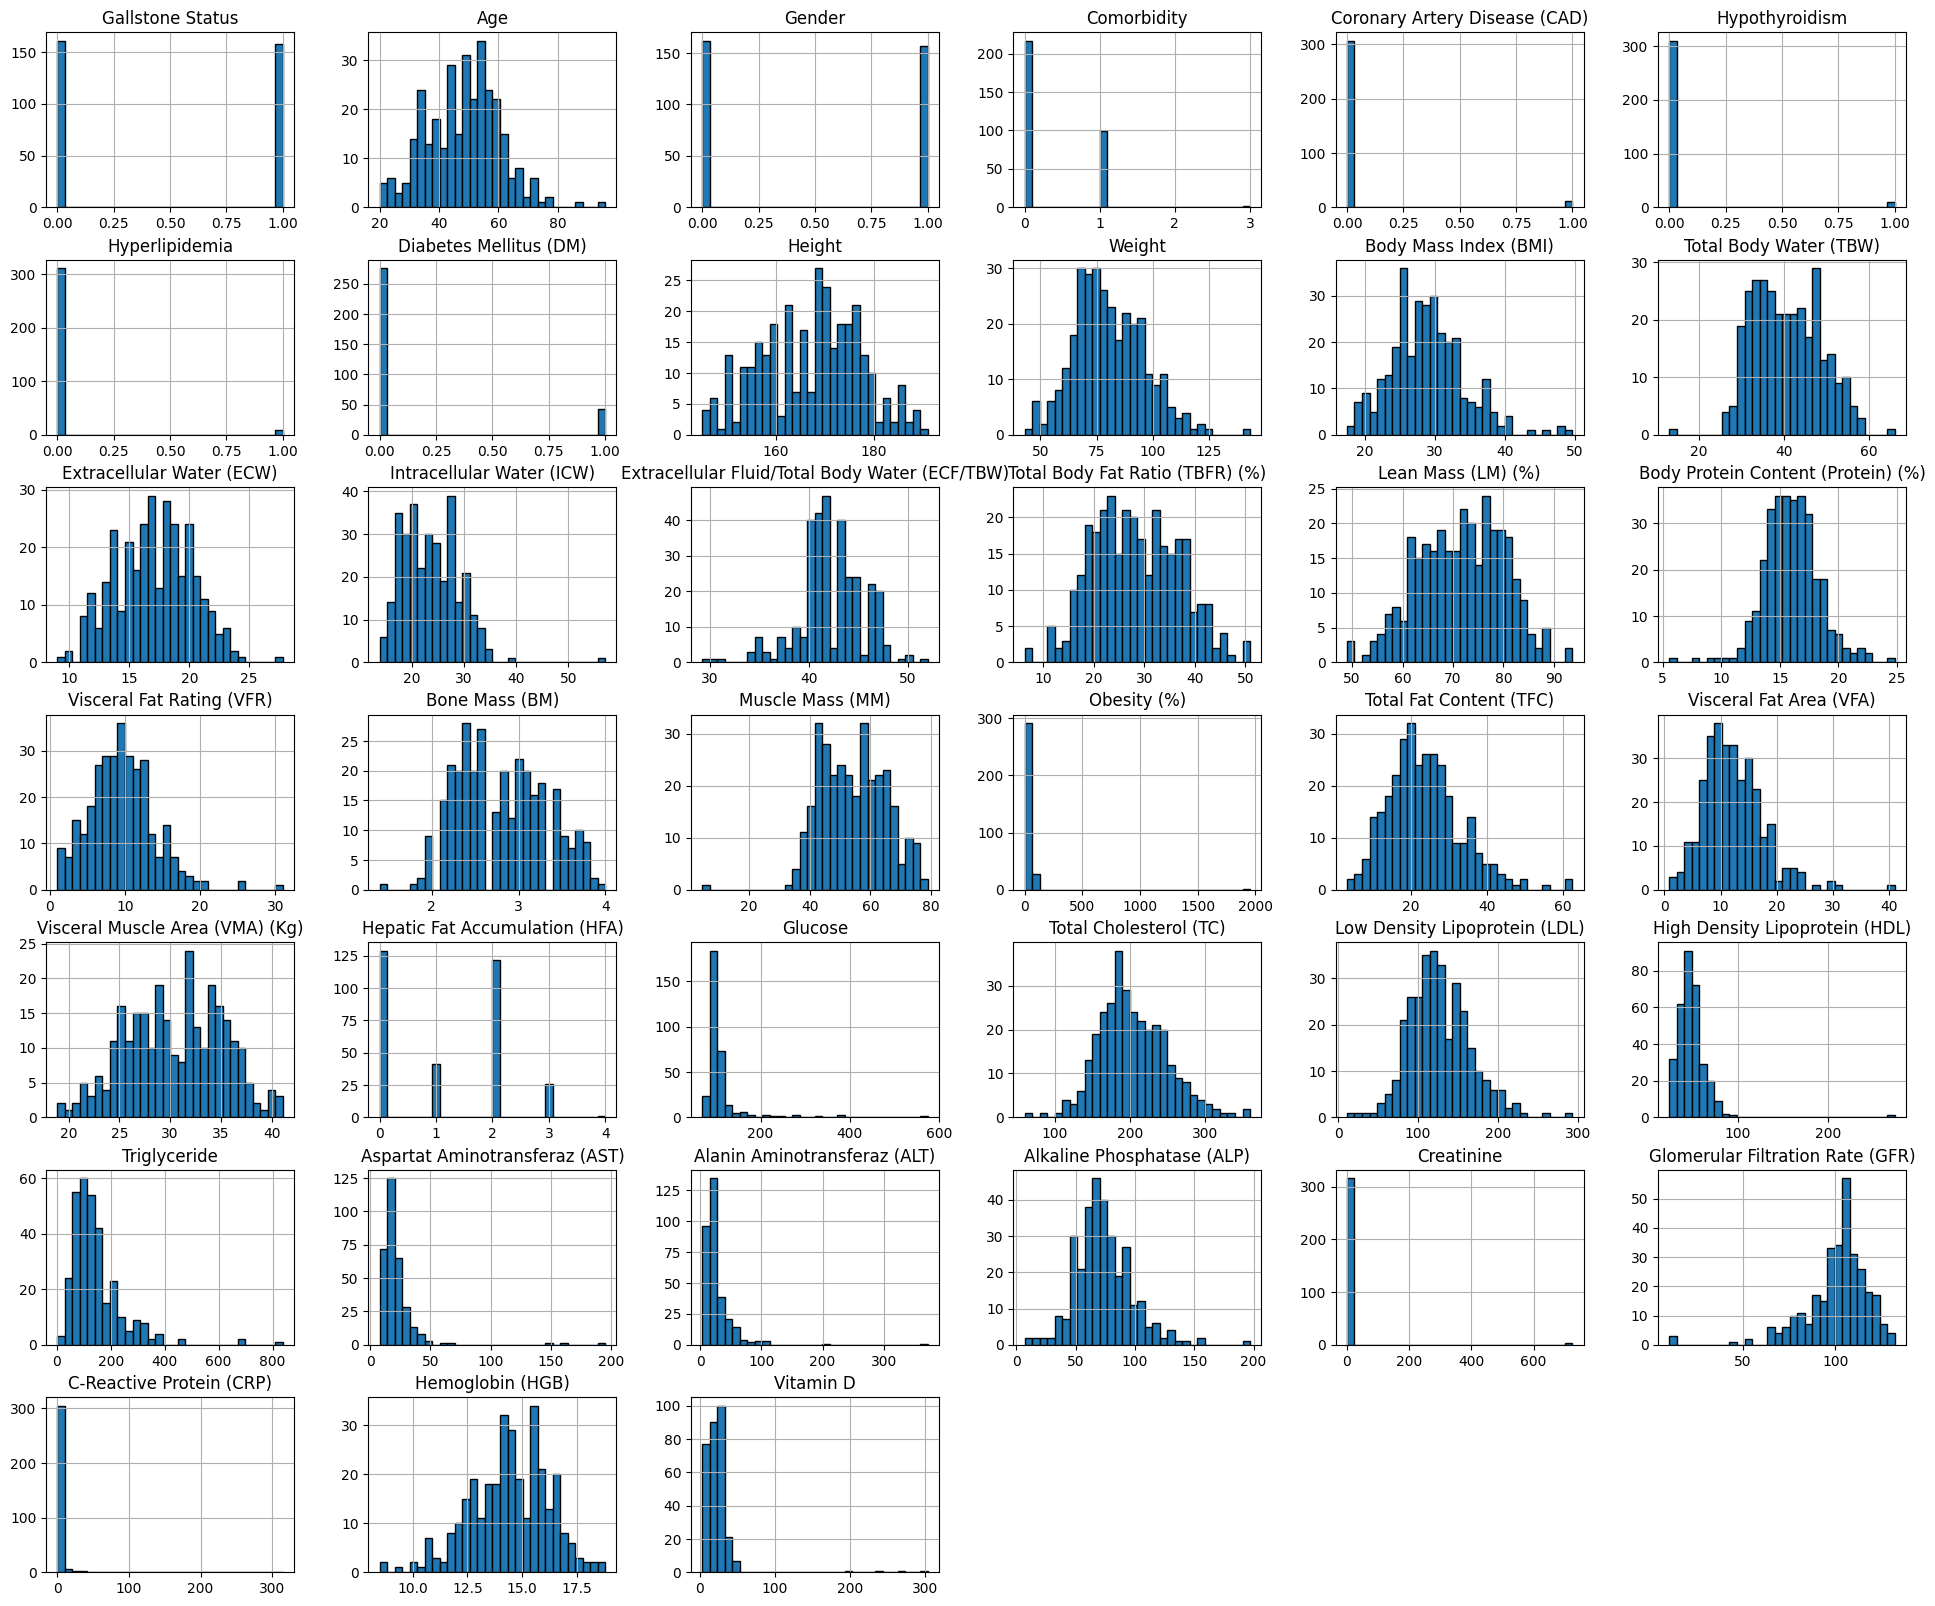

In [304]:
# Histograma para visualizar a distribuição das variáveis
df.hist(figsize=(24, 20), bins=30, edgecolor="black")
plt.show()

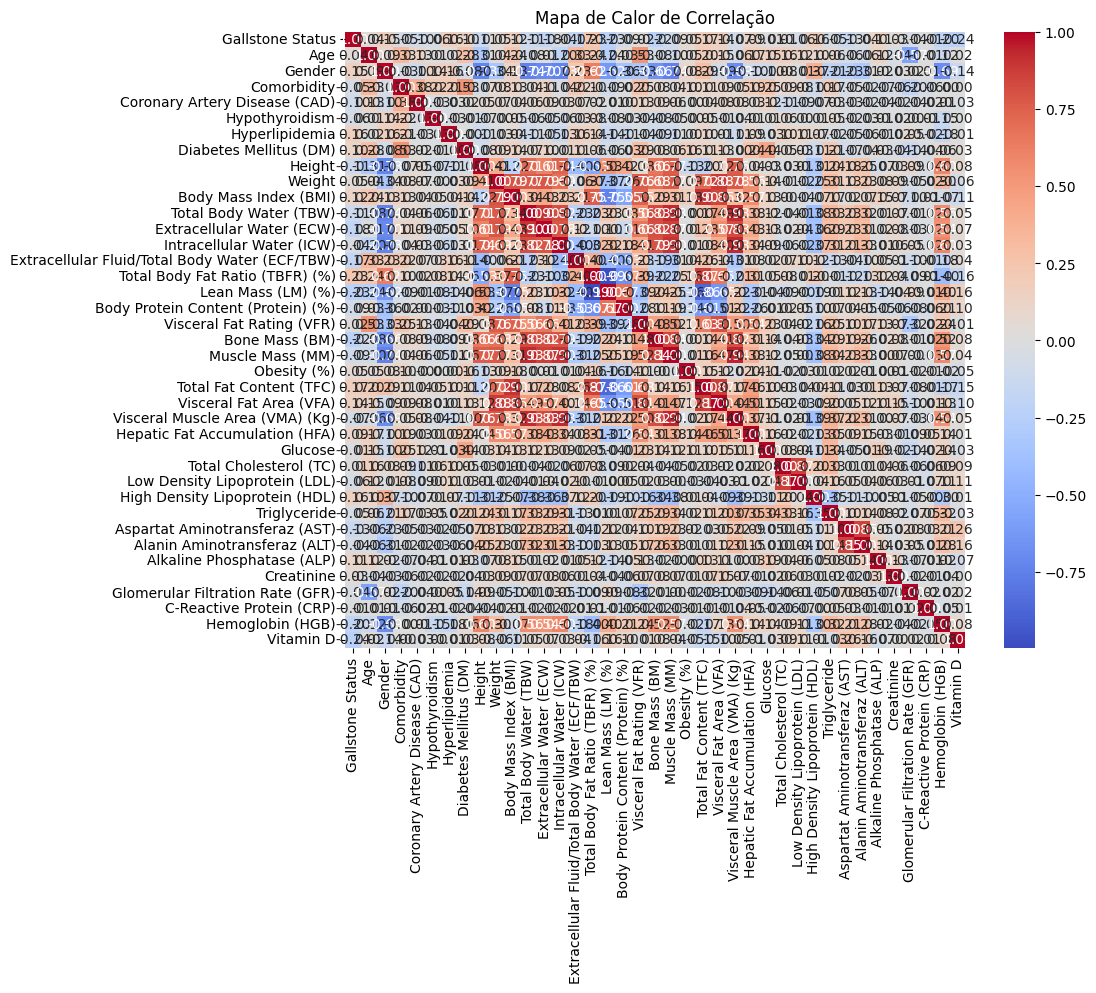

In [305]:
# Mapa de calor das variaveis numericas
plt.figure(figsize=(10, 8))
# Selecionar apenas colunas numéricas para a correlação
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlação')
plt.show()

In [306]:
# Analisando os outliers.
# Crie a cópia com as colunas selecionadas
df_numerico = df[variaveis_numericas].copy()

# Definir o limite de outliers com base no IQR (Intervalo Interquartil)
Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar quantos valores estão fora desses limites
outliers = ((df_numerico < limite_inferior) | (df_numerico > limite_superior)).sum()

# Filtra a série 'outliers' para mostrar apenas contagens maiores que 0
outliers_filtrados = outliers[outliers > 0]

# Exibe o resultado
print(outliers_filtrados)

Age                                                2
Weight                                             2
Body Mass Index (BMI)                              5
Total Body Water (TBW)                             2
Extracellular Water (ECW)                          1
Intracellular Water (ICW)                          1
Extracellular Fluid/Total Body Water (ECF/TBW)     7
Body Protein Content (Protein) (%)                 8
Visceral Fat Rating (VFR)                          3
Muscle Mass (MM)                                   1
Obesity (%)                                        7
Total Fat Content (TFC)                            7
Visceral Fat Area (VFA)                            5
Glucose                                           25
Total Cholesterol (TC)                             5
Low Density Lipoprotein (LDL)                      4
High Density Lipoprotein (HDL)                     5
Triglyceride                                      20
Aspartat Aminotransferaz (AST)                

In [307]:
media = df['Obesity (%)'].mean()
media = media*2

# Contar quantas vezes cada produto aparece
contagem_produtos = (df['Obesity (%)']>media).value_counts()

print("\nContagem de cada produto:")
print(contagem_produtos)


Contagem de cada produto:
Obesity (%)
False    302
True      17
Name: count, dtype: int64


# Preparando Os Dados Para Analise

## Tratando Os Dados Ausentes

In [308]:
# Tratando os dados de 'Visceral Muscle Area (VMA) (Kg)'
mediana_de_VMA = df['Visceral Muscle Area (VMA) (Kg)'].median()
df['Visceral Muscle Area (VMA) (Kg)'].fillna(mediana_de_VMA, inplace=True)

C:\Users\NVME\AppData\Local\Temp\ipykernel_1544\295162258.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Visceral Muscle Area (VMA) (Kg)'].fillna(mediana_de_VMA, inplace=True)


In [309]:
# Tratando os dados de 'Glomerular Filtration Rate (GFR)'
mediana_de_GFR = df['Glomerular Filtration Rate (GFR)'].median()
df['Glomerular Filtration Rate (GFR)'].fillna(mediana_de_GFR, inplace=True)

C:\Users\NVME\AppData\Local\Temp\ipykernel_1544\3388742682.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glomerular Filtration Rate (GFR)'].fillna(mediana_de_GFR, inplace=True)


In [310]:
# Tratando os dados de 'Vitamin D'
mediana_de_D = df['Vitamin D'].median()
df['Vitamin D'].fillna(mediana_de_D, inplace=True)

C:\Users\NVME\AppData\Local\Temp\ipykernel_1544\2962165668.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vitamin D'].fillna(mediana_de_D, inplace=True)


## Tratando Os Outliers

In [311]:
# Aplicando MinMaxScaler de 0 até 1 para amenizar os outliers.
scaler = MinMaxScaler(feature_range=(0,1))
df[variaveis_numericas] = scaler.fit_transform(df[variaveis_numericas])

## Tratando As Variaveis Numericas

In [312]:
# Aplicando One-Hot Encoding nas colunas textuais
df = pd.get_dummies(
    data=df,
    columns=variaveis_textuais,
    drop_first=True  # Boa prática para evitar multicolinearidade em modelos
)

In [313]:
df.head()

,Gallstone Status,Age,Height,Weight,Body Mass Index (BMI),Total Body Water (TBW),Extracellular Water (ECW),Intracellular Water (ICW),Extracellular Fluid/Total Body Water (ECF/TBW),Total Body Fat Ratio (TBFR) (%),...,Comorbidity_2,Comorbidity_3,Coronary Artery Disease (CAD)_1,Hypothyroidism_1,Hyperlipidemia_1,Diabetes Mellitus (DM)_1,Hepatic Fat Accumulation (HFA)_1,Hepatic Fat Accumulation (HFA)_2,Hepatic Fat Accumulation (HFA)_3,Hepatic Fat Accumulation (HFA)_4
0,0,0.394737,0.869565,0.496024,0.300310,0.750000,0.648936,0.413395,0.472991,0.289108,...,False,False,False,False,False,False,False,False,False,False
1,0,0.355263,0.673913,0.512922,0.405573,0.565789,0.558511,0.226328,0.692578,0.593904,...,False,False,False,False,False,False,False,False,False,False
2,0,0.539474,0.565217,0.479125,0.427245,0.642857,0.590426,0.307159,0.604743,0.470641,...,False,False,False,False,False,False,False,False,False,False
3,0,0.276316,0.500000,0.246521,0.204334,0.533835,0.425532,0.244804,0.516908,0.212909,...,False,False,False,False,False,False,True,False,False,False
4,0,0.289474,0.717391,0.464215,0.337461,0.721805,0.585106,0.406467,0.429073,0.307037,...,False,False,False,False,False,False,False,True,False,False


# Analise dos Melhores Atributos

## Coeficiente de Lasso

In [314]:
# Separar variáveis independentes (X) e dependente (y)
X = df.drop(columns=["Gallstone Status"])
Y = df["Gallstone Status"]

In [315]:
# Dividir em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [316]:
# Modelo Lasso com Cross-Validation
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, Y_train)

C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.181e-03, tolerance: 5.096e-03
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.084e-02, tolerance: 5.096e-03
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCac

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [317]:
# Coeficientes do modelo Lasso
lasso_importance = np.abs(lasso.coef_)

In [318]:
# Criar DataFrame com os resultados
lasso_feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": lasso_importance
}).sort_values(by="Importance", ascending=False)

,Feature,Importance
7,Extracellular Fluid/Total Body Water (ECF/TBW),0.900058
12,Bone Mass (BM),0.873256
30,Vitamin D,0.767197
9,Lean Mass (LM) (%),0.740844
23,Aspartat Aminotransferaz (AST),0.662149
37,Hyperlipidemia_1,0.397771
31,Gender_1,0.280841
29,Hemoglobin (HGB),0.243705
39,Hepatic Fat Accumulation (HFA)_1,0.205673
21,High Density Lipoprotein (HDL),0.197690


C:\Users\NVME\AppData\Local\Temp\ipykernel_1544\1789681967.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lasso_feature_importance["Feature"], y=lasso_feature_importance["Importance"], palette="magma")


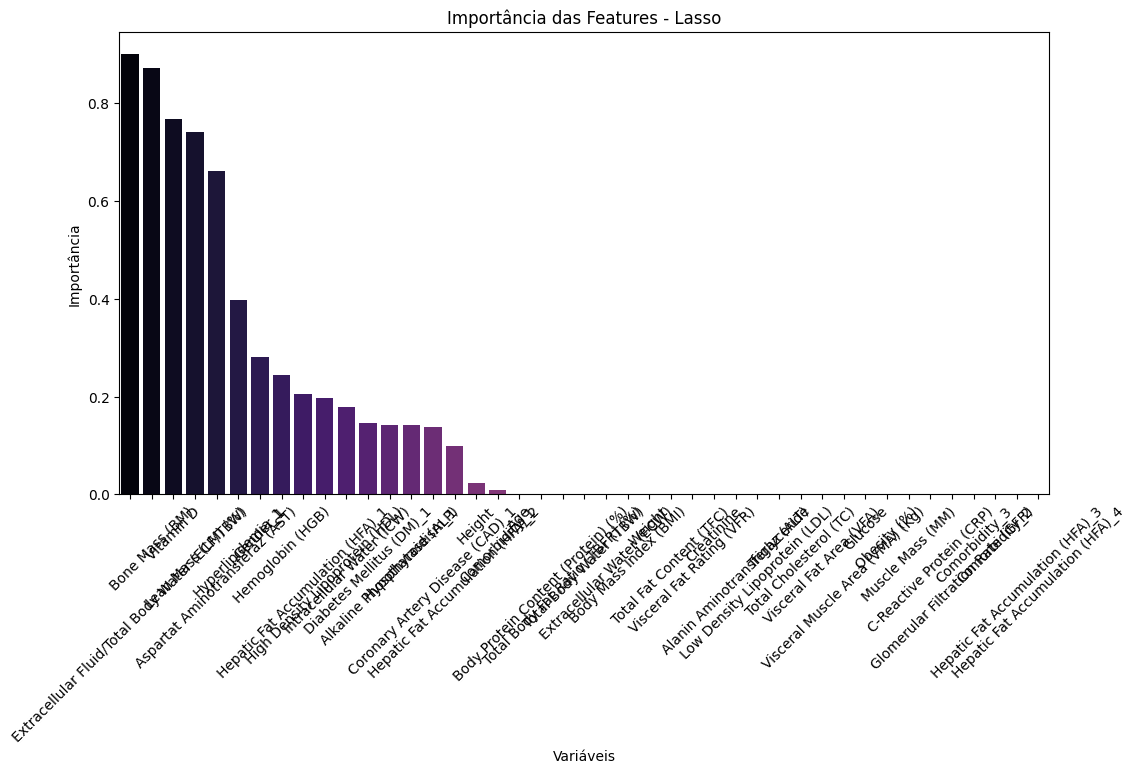

In [319]:
# Exibir a tabela
display(lasso_feature_importance)

# Plotar a importância das variáveis pelo Lasso
plt.figure(figsize=(12, 6))
sns.barplot(x=lasso_feature_importance["Feature"], y=lasso_feature_importance["Importance"], palette="magma")
plt.xticks(rotation=45)
plt.title("Importância das Features - Lasso")
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.show()

## Random Forest Para Achar Os melhores Atributos

In [320]:
# Modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [321]:
# Importância das features no Random Forest
rf_importance = rf.feature_importances_

In [322]:
# Criar DataFrame com os resultados
rf_feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_importance
}).sort_values(by="Importance", ascending=False)

,Feature,Importance
28,C-Reactive Protein (CRP),0.134118
30,Vitamin D,0.088914
7,Extracellular Fluid/Total Body Water (ECF/TBW),0.049663
17,Visceral Muscle Area (VMA) (Kg),0.044660
23,Aspartat Aminotransferaz (AST),0.039646
5,Extracellular Water (ECW),0.032848
3,Body Mass Index (BMI),0.028607
25,Alkaline Phosphatase (ALP),0.028547
12,Bone Mass (BM),0.027699
21,High Density Lipoprotein (HDL),0.027410


C:\Users\NVME\AppData\Local\Temp\ipykernel_1544\3332435527.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_feature_importance["Feature"], y=rf_feature_importance["Importance"], palette="viridis")


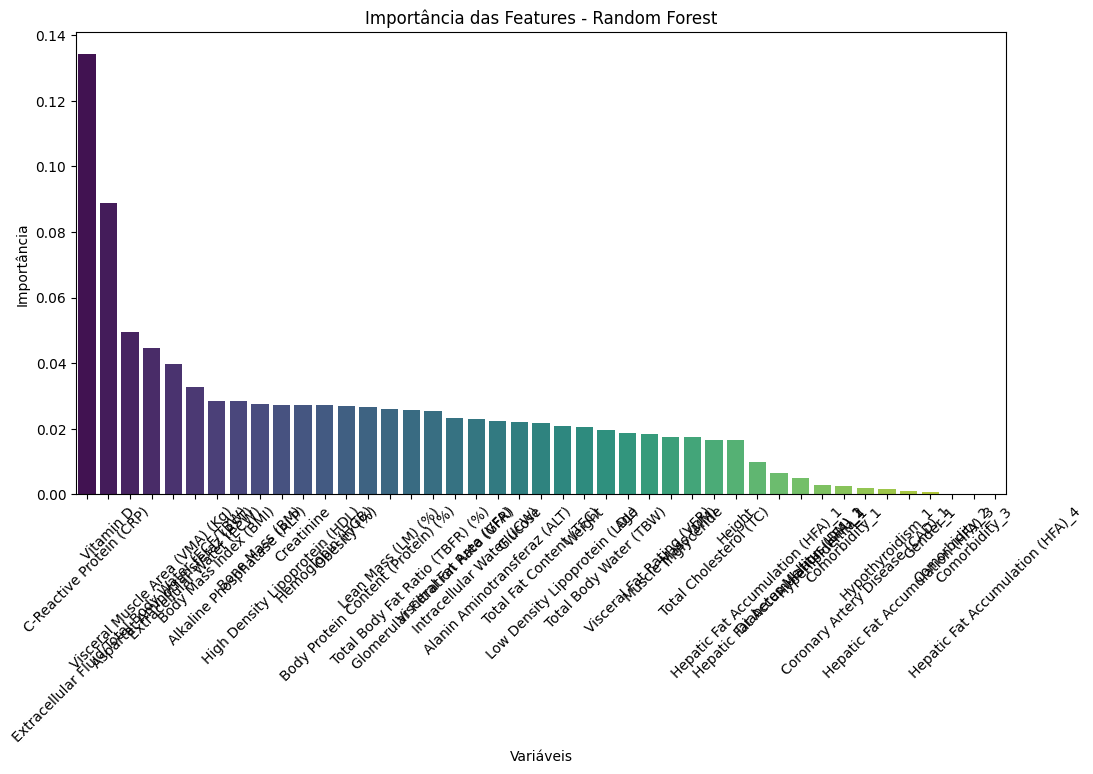

In [323]:
# Exibir a tabela
display(rf_feature_importance)

# Plotar a importância das variáveis pelo Random Forest
plt.figure(figsize=(12, 6))
sns.barplot(x=rf_feature_importance["Feature"], y=rf_feature_importance["Importance"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Importância das Features - Random Forest")
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.show()

## Unindo As Duas Tabelas Pela Média

In [324]:
# Unir (merge) os DataFrames usando o parâmetro 'suffixes'
merged_df = pd.merge(
    lasso_feature_importance, 
    rf_feature_importance, 
    on='Feature', 
    suffixes=('_Lasso', '_RF')
)

In [325]:
# Calcular a média e criar o novo DataFrame
merged_df['Average_Importance'] = (merged_df['Importance_Lasso'] + merged_df['Importance_RF']) / 2

In [326]:
# Criar o DataFrame final e ordenar
final_importance_df = merged_df[['Feature', 'Average_Importance']].sort_values(
    by='Average_Importance', 
    ascending=False
)

print("--- DataFrame Final com a Média das Importâncias ---")
print(final_importance_df)

--- DataFrame Final com a Média das Importâncias ---
                                           Feature  Average_Importance
0   Extracellular Fluid/Total Body Water (ECF/TBW)            0.474860
1                                   Bone Mass (BM)            0.450478
2                                        Vitamin D            0.428056
3                               Lean Mass (LM) (%)            0.383448
4                   Aspartat Aminotransferaz (AST)            0.350898
5                                 Hyperlipidemia_1            0.200388
6                                         Gender_1            0.140842
7                                 Hemoglobin (HGB)            0.135543
9                   High Density Lipoprotein (HDL)            0.112550
8                 Hepatic Fat Accumulation (HFA)_1            0.107741
10                       Intracellular Water (ICW)            0.101265
12                      Alkaline Phosphatase (ALP)            0.085685
11                      

## Filtrar A Tabela Só Pelas Mais Importantes

In [327]:
# Definir o limiar (threshold) de importância
limiar = 0.0001

In [328]:
# Filtrar o DataFrame para manter apenas as features acima do limiar
features_selecionadas_df = rf_feature_importance[rf_feature_importance['Importance'] > limiar]

In [329]:
# Criar uma lista com os nomes das features selecionadas
lista_features_selecionadas = features_selecionadas_df["Feature"].tolist()

# Exibir a tabela APENAS com as features selecionadas
print(f"Total de features originais: {len(X.columns)}")
print(f"Features selecionadas pelo Lasso (importância > {limiar}): {len(lista_features_selecionadas)}")
print("\n--- Tabela de Features Selecionadas ---")
display(features_selecionadas_df)

Total de features originais: 43
Features selecionadas pelo Lasso (importância > 0.0001): 41

--- Tabela de Features Selecionadas ---


,Feature,Importance
28,C-Reactive Protein (CRP),0.134118
30,Vitamin D,0.088914
7,Extracellular Fluid/Total Body Water (ECF/TBW),0.049663
17,Visceral Muscle Area (VMA) (Kg),0.044660
23,Aspartat Aminotransferaz (AST),0.039646
5,Extracellular Water (ECW),0.032848
3,Body Mass Index (BMI),0.028607
25,Alkaline Phosphatase (ALP),0.028547
12,Bone Mass (BM),0.027699
21,High Density Lipoprotein (HDL),0.027410


C:\Users\NVME\AppData\Local\Temp\ipykernel_1544\2887440835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Feature", y='Importance', data=features_selecionadas_df, palette="magma")


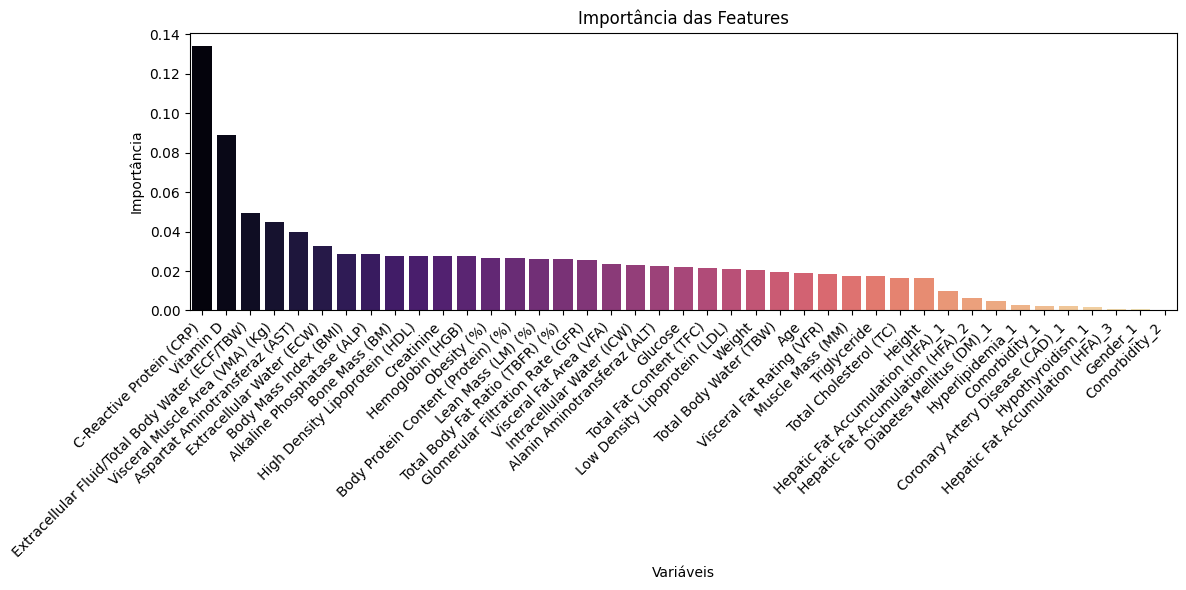

In [330]:
# Plotar a importância APENAS das features selecionadas
plt.figure(figsize=(12, 6))
sns.barplot(x="Feature", y='Importance', data=features_selecionadas_df, palette="magma")
plt.xticks(rotation=45, ha='right') # ha='right' alinha melhor os rótulos
plt.title("Importância das Features")
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.tight_layout() # Ajusta o layout para não cortar os rótulos
plt.show()

## Reajuste de Treino e Teste

In [331]:
# Reajustando X para ter só as variáveis escolhidas anteriormente.
X = X[lista_features_selecionadas]

# Dividir em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalizar os dados para o Lasso
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning

## Dummy

### Machine Learning - Dummy

In [332]:
# Definir os parâmetros para o GridSearchCV para o Dummy Classifier
param_grid_dummy = {
    'strategy': ['most_frequent', 'stratified', 'uniform', 'prior']
}

In [333]:
# Iniciar o modelo base
dummy_base = DummyClassifier(random_state=42)

In [334]:
# Configurar o GridSearchCV
grid_search_dummy = GridSearchCV(
    dummy_base,
    param_grid=param_grid_dummy,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

In [335]:
# Treinar o GridSearchCV nos dados de treino
print("\nIniciando o GridSearchCV para o Dummy Classifier...")
grid_search_dummy.fit(X_train, Y_train)
print("GridSearchCV concluído!")


Iniciando o GridSearchCV para o Dummy Classifier...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
GridSearchCV concluído!


In [336]:
# Exibir os melhores hiperparâmetros e a melhor pontuação
print("\nMelhor 'estratégia' encontrada:", grid_search_dummy.best_params_)
print(f"Melhor pontuação F1 da validação cruzada (Baseline): {grid_search_dummy.best_score_:.4f}")


Melhor 'estratégia' encontrada: {'strategy': 'stratified'}
Melhor pontuação F1 da validação cruzada (Baseline): 0.5663


In [337]:
# Obter o melhor modelo "dummy"
best_dummy_model = grid_search_dummy.best_estimator_

In [338]:
# Avaliar o melhor modelo no conjunto de TESTE
y_pred_dummy = best_dummy_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred_dummy)
VN, FP, FN, VP = cm.ravel()
especificidade = VN / (VN + FP)

print("\n--- Avaliação do Melhor Modelo Dummy (Baseline) no Conjunto de TESTE ---")
accuracy_dummy = accuracy_score(Y_test, y_pred_dummy)
print(f"Acurácia (Baseline): {accuracy_dummy:.4f}")
print(f"\nEspecificidade (Taxa de Verdadeiros Negativos): {especificidade:.4f}")
print("\nMatriz de Confusão (Baseline):")
print(confusion_matrix(Y_test, y_pred_dummy))
print("\nRelatório de Classificação (Baseline):")
print(classification_report(Y_test, y_pred_dummy))


--- Avaliação do Melhor Modelo Dummy (Baseline) no Conjunto de TESTE ---
Acurácia (Baseline): 0.4688

Especificidade (Taxa de Verdadeiros Negativos): 0.5152

Matriz de Confusão (Baseline):
[[17 16]
 [18 13]]

Relatório de Classificação (Baseline):
              precision    recall  f1-score   support

           0       0.49      0.52      0.50        33
           1       0.45      0.42      0.43        31

    accuracy                           0.47        64
   macro avg       0.47      0.47      0.47        64
weighted avg       0.47      0.47      0.47        64



## Regressão Logistica

### Machine Learning - Regressão Linear

In [339]:
# Definir os parâmetros para o GridSearchCV para Regressão Logística
param_grid_lr = {
    'C': [1, 10, 100], 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Melhores parametros encontrados para acuracia
param_grid_lr = {
    'C': [10], 
    'penalty': ['l1'],
    'solver': ['liblinear']
}

In [340]:
# Iniciar o modelo base
lr_base = LogisticRegression(random_state=42, class_weight='balanced')

In [341]:
# Configurar o GridSearchCV
grid_search_lr = GridSearchCV(
    lr_base,
    param_grid=param_grid_lr,
    cv=5, # cv=5 significa validação cruzada com 5 folds
    scoring='f1', # scoring='accuracy' indica que queremos otimizar a acurácia
    n_jobs=-1,  # Usar todos os núcleos disponíveis
    verbose=1  # Exibir progresso
)

In [342]:
# Treinar o GrindSsearchCV nos dados de treino
print("\nIniciando o GridSearchCV...")
grid_search_lr.fit(X_train, Y_train)
print("GridSearchCV concluído!")


Iniciando o GridSearchCV...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
GridSearchCV concluído!


In [343]:
# Exibir os melhores hiperparâmetros e a melhor pontuação
print("\nMelhores hiperparâmetros encontrados:", grid_search_lr.best_params_)
print(f"Melhor acurácia da validação cruzada:, {grid_search_lr.best_score_:.4f}")


Melhores hiperparâmetros encontrados: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor acurácia da validação cruzada:, 0.7699


In [344]:
# Obter o melhor modelo treinado
best_LR_model = grid_search_lr.best_estimator_

In [345]:
# Avaliar o melhor modelo no conjunto de TESTE (o que realmente importa!)
y_pred_tuned = best_LR_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred_tuned)
VN, FP, FN, VP = cm.ravel()
especificidade = VN / (VN + FP)
print("\n--- Avaliação do Melhor Modelo (Otimizado) no Conjunto de TESTE ---")
accuracy_tuned = accuracy_score(Y_test, y_pred_tuned)
print(f"Acurácia (otimizada): {accuracy_tuned:.4f}")
print(f"\nEspecificidade (Taxa de Verdadeiros Negativos): {especificidade:.4f}")
print("\nMatriz de Confusão (otimizada):")
print(confusion_matrix(Y_test, y_pred_tuned))
print("\nRelatório de Classificação (otimizado):")
print(classification_report(Y_test, y_pred_tuned))


--- Avaliação do Melhor Modelo (Otimizado) no Conjunto de TESTE ---
Acurácia (otimizada): 0.7656

Especificidade (Taxa de Verdadeiros Negativos): 0.8788

Matriz de Confusão (otimizada):
[[29  4]
 [11 20]]

Relatório de Classificação (otimizado):
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        33
           1       0.83      0.65      0.73        31

    accuracy                           0.77        64
   macro avg       0.78      0.76      0.76        64
weighted avg       0.78      0.77      0.76        64



### Machine Learning - RidgeClassifier

In [346]:
# Definir os parâmetros para o GridSearchCV para Ridge Classifier
parametros_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], # Força da regularização
    'solver': ['svd', 'cholesky', 'lsqr', 'sag'], # Algoritmos de otimização
    'random_state': [42] # Para reprodutibilidade
}

# Melhores parâmetros encontrados
parametros_grid_ridge = {
    'alpha': [0.1], # Força da regularização
    'solver': ['svd'], # Algoritmos de otimização
    'random_state': [42] # Para reprodutibilidade
}

In [347]:
# Inicializar o modelo base RidgeClassifier
ridge_base = RidgeClassifier(class_weight='balanced', random_state=42)

In [348]:
# Configurar o GridSearchCV para Ridge Classifier
grid_search_ridge = GridSearchCV(
    ridge_base,
    param_grid=parametros_grid_ridge,
    cv=5, # Validação cruzada com 5 folds
    scoring='f1', # Otimizar a acurácia
    n_jobs=-1, # Usar todos os núcleos disponíveis
    verbose=1 # Exibir progresso
)

In [349]:
# Treinar o GridSearchCV nos dados de treino (use os dados escalados se aplicável)
print("\nIniciando o GridSearchCV para Ridge Classifier...")
grid_search_ridge.fit(X_train, Y_train)
print("GridSearchCV para Ridge Classifier concluído!")


Iniciando o GridSearchCV para Ridge Classifier...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
GridSearchCV para Ridge Classifier concluído!


In [350]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para Ridge Classifier:", grid_search_ridge.best_params_)
print(f"Melhor acurácia da validação cruzada para Ridge Classifier: {grid_search_ridge.best_score_:.4f}")


Melhores hiperparâmetros encontrados para Ridge Classifier: {'alpha': 0.1, 'random_state': 42, 'solver': 'svd'}
Melhor acurácia da validação cruzada para Ridge Classifier: 0.7568


In [351]:
# Obter o melhor modelo treinado
best_ridge_model = grid_search_ridge.best_estimator_

In [352]:
# Avaliar o melhor modelo Ridge Classifier no conjunto de TESTE
y_pred_ridge_tuned = best_ridge_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred_ridge_tuned)
VN, FP, FN, VP = cm.ravel()
especificidade = VN / (VN + FP)

print("\n--- Avaliação do Melhor Modelo Ridge Classifier (Otimizado) no Conjunto de TESTE ---")
accuracy_ridge_tuned = accuracy_score(Y_test, y_pred_ridge_tuned)
print(f"Acurácia (Ridge Classifier otimizado): {accuracy_ridge_tuned:.4f}")
print(f"\nEspecificidade (Taxa de Verdadeiros Negativos): {especificidade:.4f}")
print("\nMatriz de Confusão (Ridge Classifier otimizado):")
print(confusion_matrix(Y_test, y_pred_ridge_tuned))

print("\nRelatório de Classificação (Ridge Classifier otimizado):")
print(classification_report(Y_test, y_pred_ridge_tuned))


--- Avaliação do Melhor Modelo Ridge Classifier (Otimizado) no Conjunto de TESTE ---
Acurácia (Ridge Classifier otimizado): 0.7031

Especificidade (Taxa de Verdadeiros Negativos): 0.8485

Matriz de Confusão (Ridge Classifier otimizado):
[[28  5]
 [14 17]]

Relatório de Classificação (Ridge Classifier otimizado):
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        33
           1       0.77      0.55      0.64        31

    accuracy                           0.70        64
   macro avg       0.72      0.70      0.69        64
weighted avg       0.72      0.70      0.70        64



### Machine Learning - SGDClassifier

In [353]:
# Estes são os hiperparâmetros mais comuns para o SGDClassifier
param_grid_sgd = {
    'loss': ['hinge', 'log_loss', 'modified_huber'], # 'hinge' = SVM, 'log_loss' = Regressão Logística
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1], # Força da regularização
    'max_iter': [1000, 1500] # Número máximo de épocas
}

In [354]:
# Iniciar o modelo base ---
sgd_base = SGDClassifier(random_state=42, class_weight='balanced')

In [355]:
# Configurar o GridSearchCV
grid_search_sgd = GridSearchCV(
    estimator=sgd_base,
    param_grid=param_grid_sgd,
    cv=5,                 # Validação cruzada com 5 folds
    scoring='f1',         # Métrica de avaliação para otimização
    n_jobs=-1,            # Usar todos os núcleos disponíveis
    verbose=1             # Exibir progresso
)

In [356]:
# Treinar o GridSearchCV nos dados de treino
print("\nIniciando o GridSearchCV para o SGDClassifier...")
grid_search_sgd.fit(X_train, Y_train)
print("GridSearchCV concluído!")


Iniciando o GridSearchCV para o SGDClassifier...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
GridSearchCV concluído!


In [357]:
# Exibir os melhores resultados
print("\nMelhores hiperparâmetros encontrados:", grid_search_sgd.best_params_)
print(f"Melhor F1-score da validação cruzada: {grid_search_sgd.best_score_:.4f}")


Melhores hiperparâmetros encontrados: {'alpha': 0.001, 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': 'l1'}
Melhor F1-score da validação cruzada: 0.7607


In [358]:
# Obter o melhor modelo treinado a partir da busca
best_SGD_model = grid_search_sgd.best_estimator_

In [359]:
# Avaliar o melhor modelo no conjunto de TESTE
y_pred_tuned_sgd = best_SGD_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred_tuned_sgd)
VN, FP, FN, VP = cm.ravel()
especificidade = VN / (VN + FP)

print("\n--- Avaliação do Melhor Modelo SGD (Otimizado) no Conjunto de TESTE ---")
accuracy_tuned_sgd = accuracy_score(Y_test, y_pred_tuned_sgd)
print(f"Acurácia (otimizada): {accuracy_tuned_sgd:.4f}")
print(f"\nEspecificidade (Taxa de Verdadeiros Negativos): {especificidade:.4f}")
print("\nMatriz de Confusão (otimizada):")
print(confusion_matrix(Y_test, y_pred_tuned_sgd))
print("\nRelatório de Classificação (otimizado):")
print(classification_report(Y_test, y_pred_tuned_sgd))


--- Avaliação do Melhor Modelo SGD (Otimizado) no Conjunto de TESTE ---
Acurácia (otimizada): 0.7031

Especificidade (Taxa de Verdadeiros Negativos): 0.6364

Matriz de Confusão (otimizada):
[[21 12]
 [ 7 24]]

Relatório de Classificação (otimizado):
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        33
           1       0.67      0.77      0.72        31

    accuracy                           0.70        64
   macro avg       0.71      0.71      0.70        64
weighted avg       0.71      0.70      0.70        64



## Arvore de Decisão

### Machine Learning - Floresta Aleatoria (Random Forest)

In [360]:
# Definir os parâmetros para o GridSearchCV para Random Forest
parametros_grid_rf = {
   'n_estimators': [50, 100, 150, 200, 250],  # Número de árvores na floresta'
   'criterion': ['gini', 'entropy', 'log_loss'],  # Critério de divisão
   'max_depth': [None, 5, 10, 15, 20],  # Profundidade máxima das árvores
   'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
   'min_samples_leaf': [1, 2, 4],  # Número mínimo de amostras necessárias em um nó folha
   'max_features': ['auto', 'sqrt', 'log2'],  # Número de recursos a serem considerados ao procurar a melhor divisão
   'random_state': [42]  # Para reprodutibilidade
}

# O melhor conjunto de parâmetros para o GridSearchCV para Random Forest para acuracia
parametros_grid_rf = {
   'n_estimators': [50],  # Número de árvores na floresta'
   'criterion': ['gini'],  # Critério de divisão
   'max_depth': [5],  # Profundidade máxima das árvores
   'min_samples_split': [10],  # Número mínimo de amostras necessárias para dividir um nó
   'min_samples_leaf': [4],  # Número mínimo de amostras necessárias em um nó folha
   'max_features': ['sqrt'],  # Número de recursos a serem considerados ao procurar a melhor divisão
   'random_state': [42]  # Para reprodutibilidade
}

In [361]:
# Inicializar o modelo base Random Forest
rf_base = RandomForestClassifier(class_weight='balanced', random_state=42)

In [362]:
# Configurar o GridSearchCV para Random Forest
grid_search_rf = GridSearchCV(
    rf_base,
    param_grid=parametros_grid_rf,
    cv=5, # Validação cruzada com 5 folds
    scoring='f1', # Otimizar a acurácia
    n_jobs=-1,  # Usar todos os núcleos disponíveis
    verbose=1  # Exibir progresso
)

In [363]:
# Treinar o GridSearchCV nos dados de treino
print("\nIniciando o GridSearchCV para Random Forest...")
grid_search_rf.fit(X_train, Y_train)
print("GridSearchCV para Random Forest concluído!")


Iniciando o GridSearchCV para Random Forest...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
GridSearchCV para Random Forest concluído!


In [364]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para Random Forest:", grid_search_rf.best_params_)
print(f"Melhor acurácia da validação cruzada para Random Forest: {grid_search_rf.best_score_:.4f}")


Melhores hiperparâmetros encontrados para Random Forest: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50, 'random_state': 42}
Melhor acurácia da validação cruzada para Random Forest: 0.7341


In [365]:
# Obter o melhor modelo treinado
best_rf_model = grid_search_rf.best_estimator_

In [366]:
# Avaliar o melhor modelo Random Forest no conjunto de TESTE
y_pred_rf_tuned = best_rf_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred_rf_tuned)
VN, FP, FN, VP = cm.ravel()
especificidade = VN / (VN + FP)

print("\n--- Avaliação do Melhor Modelo Random Forest (Otimizado) no Conjunto de TESTE ---")
accuracy_rf_tuned = accuracy_score(Y_test, y_pred_rf_tuned)
print(f"Acurácia (Random Forest otimizado): {accuracy_rf_tuned:.4f}")
print(f"\nEspecificidade (Taxa de Verdadeiros Negativos): {especificidade:.4f}")
print("\nMatriz de Confusão (Random Forest otimizado):")
print(confusion_matrix(Y_test, y_pred_rf_tuned))
print("\nRelatório de Classificação (Random Forest otimizado):")
print(classification_report(Y_test, y_pred_rf_tuned))


--- Avaliação do Melhor Modelo Random Forest (Otimizado) no Conjunto de TESTE ---
Acurácia (Random Forest otimizado): 0.8281

Especificidade (Taxa de Verdadeiros Negativos): 0.8788

Matriz de Confusão (Random Forest otimizado):
[[29  4]
 [ 7 24]]

Relatório de Classificação (Random Forest otimizado):
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.86      0.77      0.81        31

    accuracy                           0.83        64
   macro avg       0.83      0.83      0.83        64
weighted avg       0.83      0.83      0.83        64



### Machine Learning - GradientBoostingClassifier

In [367]:
# Definir a grade de hiperparâmetros para GradientBoostingClassifier
param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

In [368]:
# Inicializar o modelo base GradientBoostingClassifier
gbm_base = GradientBoostingClassifier(random_state=42)

In [369]:
# Configurar o GridSearchCV para XGBoost
grid_search_gbm = GridSearchCV(estimator=gbm_base, 
                               param_grid=param_grid_gbm,
                               cv=5, # Validação cruzada com 5 folds
                               scoring='f1', # Métrica de avaliação
                               n_jobs=-1, # Usar todos os núcleos disponíveis
                               verbose=1 # Exibir progresso
                               )

In [370]:
# Treinar o GridSearchCV nos dados de TREINO
print("\nIniciando a busca em grade para otimização de hiperparâmetros do GradientBoostingClassifier...")
grid_search_gbm.fit(X_train, Y_train)
print("Busca em grade concluída!")


Iniciando a busca em grade para otimização de hiperparâmetros do GradientBoostingClassifier...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Busca em grade concluída!


In [371]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para GradientBoostingClassifier:", grid_search_gbm.best_params_)
print(f"Melhor acurácia da validação cruzada para GradientBoostingClassifier: {grid_search_gbm.best_score_:.4f}")


Melhores hiperparâmetros encontrados para GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Melhor acurácia da validação cruzada para GradientBoostingClassifier: 0.7795


In [372]:
# Obter o melhor modelo treinado
best_gbm_model = grid_search_gbm.best_estimator_

In [373]:
# Avaliar o melhor modelo XGBoost no conjunto de TESTE
y_pred_gbm_tuned = best_gbm_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred_gbm_tuned)
VN, FP, FN, VP = cm.ravel()
especificidade = VN / (VN + FP)


print("\n--- Avaliação do Melhor Modelo GradientBoostingClassifier (Otimizado) no Conjunto de TESTE ---")
accuracy_xgb_tuned = accuracy_score(Y_test, y_pred_gbm_tuned)
print(f"Acurácia (GradientBoostingClassifier otimizado): {accuracy_xgb_tuned:.4f}")
print(f"\nEspecificidade (Taxa de Verdadeiros Negativos): {especificidade:.4f}")
print("\nMatriz de Confusão (GradientBoostingClassifier otimizado):")
print(confusion_matrix(Y_test, y_pred_gbm_tuned))
print("\nRelatório de Classificação (GradientBoostingClassifier otimizado):")
print(classification_report(Y_test, y_pred_gbm_tuned))


--- Avaliação do Melhor Modelo GradientBoostingClassifier (Otimizado) no Conjunto de TESTE ---
Acurácia (GradientBoostingClassifier otimizado): 0.8750

Especificidade (Taxa de Verdadeiros Negativos): 0.9091

Matriz de Confusão (GradientBoostingClassifier otimizado):
[[30  3]
 [ 5 26]]

Relatório de Classificação (GradientBoostingClassifier otimizado):
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.90      0.84      0.87        31

    accuracy                           0.88        64
   macro avg       0.88      0.87      0.87        64
weighted avg       0.88      0.88      0.87        64



Gerando o Gráfico de Resumo SHAP...


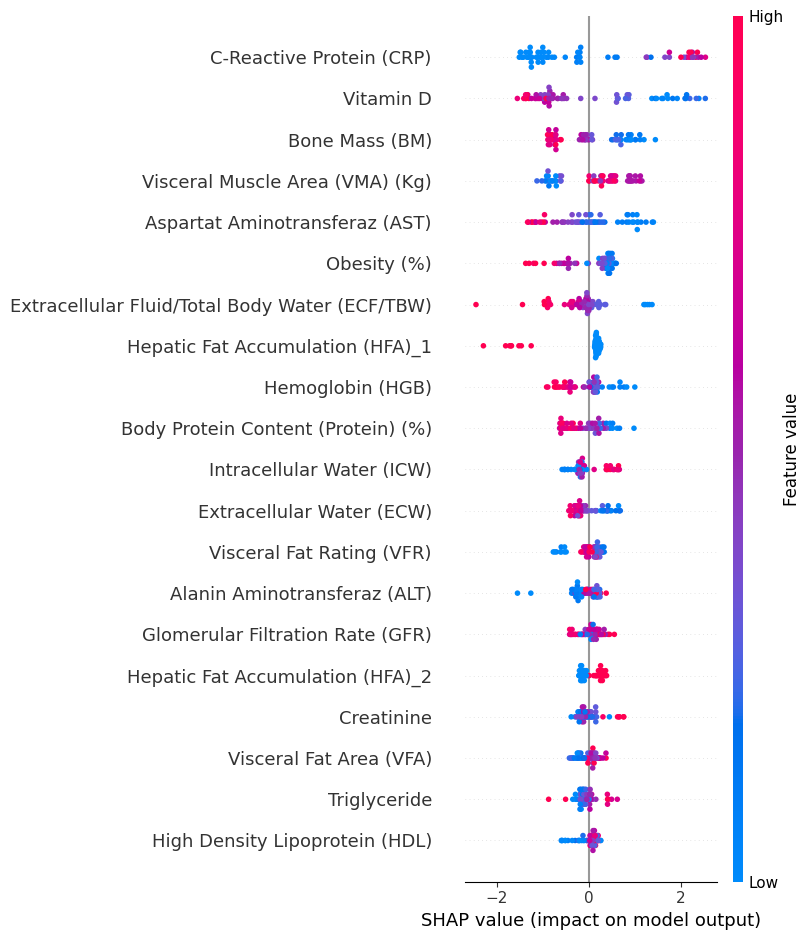

In [374]:
# PASSO 1: Selecione o modelo que você deseja explicar
model_to_explain = best_gbm_model

# PASSO 2: Crie o objeto Explainer do SHAP
# IMPORTANTE: Use os dados de treino NORMALIZADOS
explainer = shap.Explainer(model_to_explain, X_train)

# PASSO 3: Calcule os valores SHAP para o conjunto de teste
# IMPORTANTE: Use os dados de teste NORMALIZADOS e adicione o parâmetro check_additivity=False
shap_values = explainer(X_test, check_additivity=False)

# PASSO 4: Gere o Gráfico de Resumo (Summary Plot)
print("Gerando o Gráfico de Resumo SHAP...")

shap.summary_plot(shap_values, 
                  X_test, 
                  feature_names=X.columns,
                  show=False) 

plt.savefig('shap_summary_plot.png', bbox_inches='tight')
plt.show()

### Machine Learning - XGBoost

In [375]:
# Definir a grade de hiperparâmetros para XGBoost
param_grid_xgb = {
   'n_estimators': [100, 200, 300], # Número de árvores
   'learning_rate': [0.01, 0.05, 0.1], # Taxa de aprendizado
   'max_depth': [3, 5, 7], # Profundidade máxima de cada árvore
   'subsample': [0.7, 0.9], # Pode adicionar mais aqui se quiser explorar
   'colsample_bytree': [0.7, 0.9], # Pode adicionar mais aqui
   'gamma': [0, 0.1, 0.2], # Regularização
   'random_state': [42], # Para reprodutibilidade
}

# Melhores parametros achado para acuracia
param_grid_xgb = {
   'n_estimators': [300], # Número de árvores
   'learning_rate': [0.1], # Taxa de aprendizado
   'max_depth': [3], # Profundidade máxima de cada árvore
   'subsample': [0.7], # Pode adicionar mais aqui se quiser explorar
   'colsample_bytree': [0.7], # Pode adicionar mais aqui
   'gamma': [0], # Regularização
   'random_state': [42], # Para reprodutibilidade
}

In [376]:
# Inicializar o modelo base XGBoost
xgb_base = xgb.XGBClassifier(use_label_encoder=False, # Para evitar warnings recentes do XGBoost, 
                             eval_metric='logloss', # Definindo a métrica de avaliação
                             )

In [377]:
# Configurar o GridSearchCV para XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_base, 
                               param_grid=param_grid_xgb,
                               cv=5, # Validação cruzada com 5 folds
                               scoring='f1', # Métrica de avaliação
                               n_jobs=-1, # Usar todos os núcleos disponíveis
                               verbose=1 # Exibir progresso
                               )

In [378]:
# Treinar o GridSearchCV nos dados de TREINO
print("\nIniciando a busca em grade para otimização de hiperparâmetros do XGBoost...")
grid_search_xgb.fit(X_train, Y_train)
print("Busca em grade concluída!")


Iniciando a busca em grade para otimização de hiperparâmetros do XGBoost...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:05:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Busca em grade concluída!


In [379]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para XGBoost:", grid_search_xgb.best_params_)
print(f"Melhor acurácia da validação cruzada para XGBoost: {grid_search_xgb.best_score_:.4f}")


Melhores hiperparâmetros encontrados para XGBoost: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'random_state': 42, 'subsample': 0.7}
Melhor acurácia da validação cruzada para XGBoost: 0.7951


In [380]:
# Obter o melhor modelo treinado
best_xgb_model = grid_search_xgb.best_estimator_

In [381]:
# Avaliar o melhor modelo XGBoost no conjunto de TESTE
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred_xgb_tuned)
VN, FP, FN, VP = cm.ravel()
especificidade = VN / (VN + FP)

print("\n--- Avaliação do Melhor Modelo XGBoost (Otimizado) no Conjunto de TESTE ---")
accuracy_xgb_tuned = accuracy_score(Y_test, y_pred_xgb_tuned)
print(f"Acurácia (XGBoost otimizado): {accuracy_xgb_tuned:.4f}")
print(f"\nEspecificidade (Taxa de Verdadeiros Negativos): {especificidade:.4f}")
print("\nMatriz de Confusão (XGBoost otimizado):")
print(confusion_matrix(Y_test, y_pred_xgb_tuned))
print("\nRelatório de Classificação (XGBoost otimizado):")
print(classification_report(Y_test, y_pred_xgb_tuned))


--- Avaliação do Melhor Modelo XGBoost (Otimizado) no Conjunto de TESTE ---
Acurácia (XGBoost otimizado): 0.8594

Especificidade (Taxa de Verdadeiros Negativos): 0.8485

Matriz de Confusão (XGBoost otimizado):
[[28  5]
 [ 4 27]]

Relatório de Classificação (XGBoost otimizado):
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.84      0.87      0.86        31

    accuracy                           0.86        64
   macro avg       0.86      0.86      0.86        64
weighted avg       0.86      0.86      0.86        64



Gerando o Gráfico de Resumo SHAP...


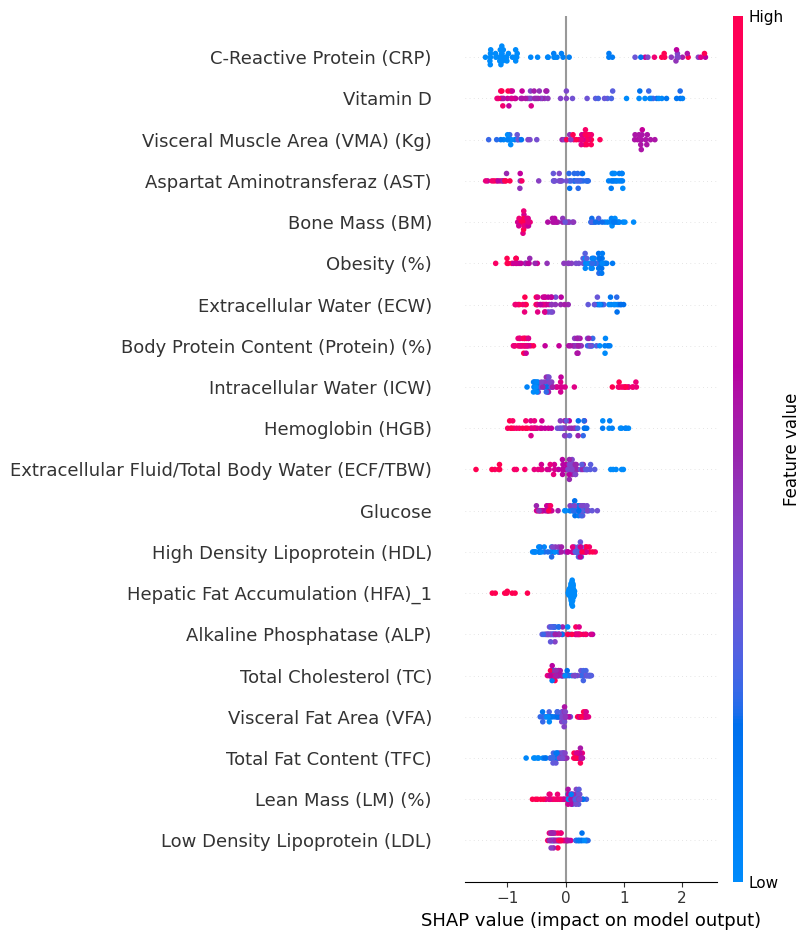

In [382]:
# PASSO 1: Selecione o modelo que você deseja explicar
model_to_explain = best_xgb_model

# PASSO 2: Crie o objeto Explainer do SHAP
# IMPORTANTE: Use os dados de treino NORMALIZADOS
explainer = shap.Explainer(model_to_explain, X_train)

# PASSO 3: Calcule os valores SHAP para o conjunto de teste
# IMPORTANTE: Use os dados de teste NORMALIZADOS e adicione o parâmetro check_additivity=False
shap_values = explainer(X_test, check_additivity=False)

# PASSO 4: Gere o Gráfico de Resumo (Summary Plot)
print("Gerando o Gráfico de Resumo SHAP...")

shap.summary_plot(shap_values, 
                  X_test, 
                  feature_names=X.columns,
                  show=False) 

plt.savefig('shap_summary_plot.png', bbox_inches='tight')
plt.show()

Matriz de Confusão (Array):
[[28  5]
 [ 4 27]]


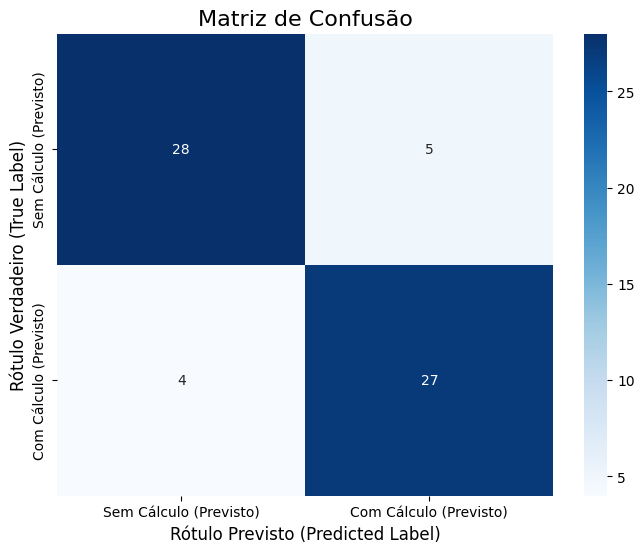

In [383]:
cm = confusion_matrix(Y_test, y_pred_xgb_tuned)

class_labels = ['Sem Cálculo (Previsto)', 'Com Cálculo (Previsto)']

print("Matriz de Confusão (Array):")
print(cm)

# --- 3. Plotar o Gráfico da Matriz de Confusão ---
plt.figure(figsize=(8, 6))

# O heatmap do Seaborn é ideal para visualizar a matriz de confusão
# annot=True: exibe os números em cada célula do heatmap
# fmt='d': formata os números como inteiros
# cmap: define o esquema de cores
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

# Adicionar títulos e rótulos para maior clareza
plt.title('Matriz de Confusão', fontsize=16)
plt.ylabel('Rótulo Verdadeiro (True Label)', fontsize=12)
plt.xlabel('Rótulo Previsto (Predicted Label)', fontsize=12)

# Exibir o gráfico
plt.show()

### Machine Learning - CatBoostClassifier

In [384]:
# Definir os parâmetros para o GridSearchCV para o CatBoost
param_grid_cbc = {
    'iterations': [200, 500],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5] # Parâmetro de regularização L2
}

In [385]:
# Iniciar o modelo base
cbc_base = CatBoostClassifier(random_state=42, verbose=0)

In [386]:
# Configurar o GridSearchCV
grid_search_cbc = GridSearchCV(
    cbc_base,
    param_grid=param_grid_cbc,
    cv=5, # cv=5 significa validação cruzada com 5 folds
    scoring='f1', # Usando a métrica f1, como no seu exemplo
    n_jobs=-1,  # Usar todos os núcleos disponíveis
    verbose=2   # Exibir mais detalhes do progresso
)

In [387]:
# Treinar o GridSearchCV nos dados de treino
print("\nIniciando o GridSearchCV para o CatBoost...")
grid_search_cbc.fit(X_train, Y_train)
print("GridSearchCV concluído!")


Iniciando o GridSearchCV para o CatBoost...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV concluído!


In [388]:
# Exibir os melhores hiperparâmetros e a melhor pontuação
print("\nMelhores hiperparâmetros encontrados:", grid_search_cbc.best_params_)
print(f"Melhor pontuação F1 da validação cruzada: {grid_search_cbc.best_score_:.4f}")


Melhores hiperparâmetros encontrados: {'depth': 6, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.01}
Melhor pontuação F1 da validação cruzada: 0.7936


In [389]:
# Obter o melhor modelo treinado
best_catboost_model = grid_search_cbc.best_estimator_

In [390]:
# Avaliar o melhor modelo no conjunto de TESTE
y_pred_tuned = best_catboost_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred_tuned)
VN, FP, FN, VP = cm.ravel()
especificidade = VN / (VN + FP)

print("\n--- Avaliação do Melhor Modelo CatBoost (Otimizado) no Conjunto de TESTE ---")
accuracy_tuned = accuracy_score(Y_test, y_pred_tuned)
print(f"Acurácia (otimizada): {accuracy_tuned:.4f}")
print(f"\nEspecificidade (Taxa de Verdadeiros Negativos): {especificidade:.4f}")
print("\nMatriz de Confusão (otimizada):")
print(confusion_matrix(Y_test, y_pred_tuned))
print("\nRelatório de Classificação (otimizado):")
print(classification_report(Y_test, y_pred_tuned))


--- Avaliação do Melhor Modelo CatBoost (Otimizado) no Conjunto de TESTE ---
Acurácia (otimizada): 0.8438

Especificidade (Taxa de Verdadeiros Negativos): 0.8788

Matriz de Confusão (otimizada):
[[29  4]
 [ 6 25]]

Relatório de Classificação (otimizado):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.86      0.81      0.83        31

    accuracy                           0.84        64
   macro avg       0.85      0.84      0.84        64
weighted avg       0.84      0.84      0.84        64



Gerando o Gráfico de Resumo SHAP...


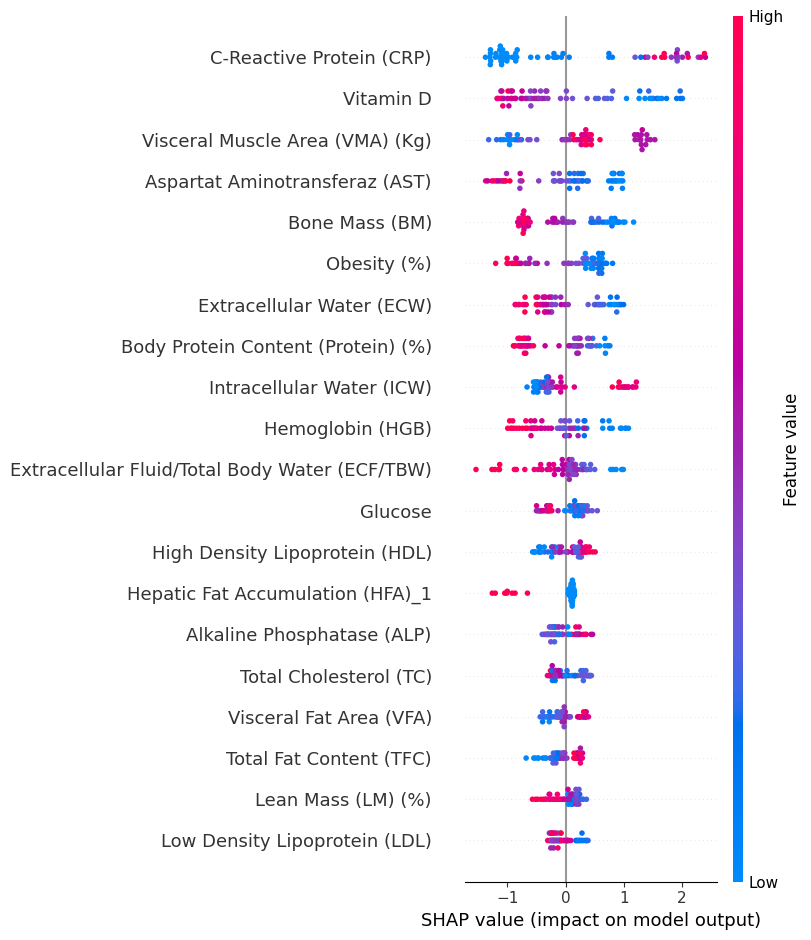

In [391]:
# PASSO 1: Selecione o modelo que você deseja explicar
model_to_explain = best_xgb_model

# PASSO 2: Crie o objeto Explainer do SHAP
# IMPORTANTE: Use os dados de treino NORMALIZADOS
explainer = shap.Explainer(model_to_explain, X_train)

# PASSO 3: Calcule os valores SHAP para o conjunto de teste
# IMPORTANTE: Use os dados de teste NORMALIZADOS e adicione o parâmetro check_additivity=False
shap_values = explainer(X_test, check_additivity=False)

# PASSO 4: Gere o Gráfico de Resumo (Summary Plot)
print("Gerando o Gráfico de Resumo SHAP...")

shap.summary_plot(shap_values, 
                  X_test, 
                  feature_names=X.columns,
                  show=False) 

plt.savefig('shap_summary_plot.png', bbox_inches='tight')
plt.show()

Matriz de Confusão (Array):
[[28  5]
 [ 4 27]]


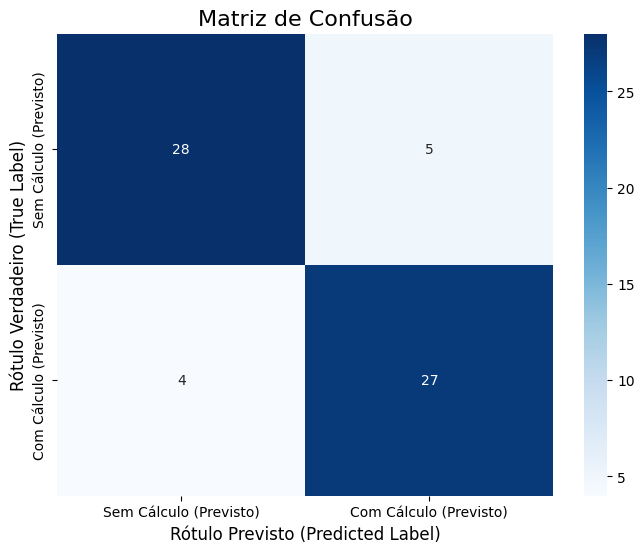

In [392]:
cm = confusion_matrix(Y_test, y_pred_xgb_tuned)

class_labels = ['Sem Cálculo (Previsto)', 'Com Cálculo (Previsto)']

print("Matriz de Confusão (Array):")
print(cm)

# --- 3. Plotar o Gráfico da Matriz de Confusão ---
plt.figure(figsize=(8, 6))

# O heatmap do Seaborn é ideal para visualizar a matriz de confusão
# annot=True: exibe os números em cada célula do heatmap
# fmt='d': formata os números como inteiros
# cmap: define o esquema de cores
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

# Adicionar títulos e rótulos para maior clareza
plt.title('Matriz de Confusão', fontsize=16)
plt.ylabel('Rótulo Verdadeiro (True Label)', fontsize=12)
plt.xlabel('Rótulo Previsto (Predicted Label)', fontsize=12)

# Exibir o gráfico
plt.show()

### Machine Learning - ExtraTreesClassifier

In [393]:
# Definir os parâmetros para o GridSearchCV para o Extra Trees
param_grid_et = {
    'n_estimators': [100, 200, 300], # Número de árvores na floresta
    'max_depth': [10, 20, None],      # Profundidade máxima das árvores (None = sem limite)
    'min_samples_split': [2, 5],     # Mínimo de amostras para dividir um nó
    'criterion': ['gini', 'entropy'] # Critério para medir a qualidade da divisão
}

In [394]:
# Iniciar o modelo base
et_base = ExtraTreesClassifier(random_state=42)

In [395]:
# Configurar o GridSearchCV
grid_search_et = GridSearchCV(
    et_base,
    param_grid=param_grid_et,
    cv=5, # cv=5 significa validação cruzada com 5 folds
    scoring='f1', # Otimizando pela métrica F1
    n_jobs=-1,  # Usar todos os núcleos disponíveis
    verbose=2   # Exibir mais detalhes do progresso
)

In [396]:
# Treinar o GridSearchCV nos dados de treino
print("\nIniciando o GridSearchCV para o Extra Trees Classifier...")
grid_search_et.fit(X_train, Y_train)
print("GridSearchCV concluído!")


Iniciando o GridSearchCV para o Extra Trees Classifier...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV concluído!


In [397]:
# Exibir os melhores hiperparâmetros e a melhor pontuação
print("\nMelhores hiperparâmetros encontrados:", grid_search_et.best_params_)
print(f"Melhor pontuação F1 da validação cruzada: {grid_search_et.best_score_:.4f}")


Melhores hiperparâmetros encontrados: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Melhor pontuação F1 da validação cruzada: 0.7736


In [398]:
# Obter o melhor modelo treinado
best_et_model = grid_search_et.best_estimator_

In [399]:
# Avaliar o melhor modelo no conjunto de TESTE
y_pred_tuned = best_et_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred_tuned)
VN, FP, FN, VP = cm.ravel()
especificidade = VN / (VN + FP)

print("\n--- Avaliação do Melhor Modelo Extra Trees (Otimizado) no Conjunto de TESTE ---")
accuracy_tuned = accuracy_score(Y_test, y_pred_tuned)
print(f"Acurácia (otimizada): {accuracy_tuned:.4f}")
print(f"\nEspecificidade (Taxa de Verdadeiros Negativos): {especificidade:.4f}")
print("\nMatriz de Confusão (otimizada):")
print(confusion_matrix(Y_test, y_pred_tuned))
print("\nRelatório de Classificação (otimizado):")
print(classification_report(Y_test, y_pred_tuned))


--- Avaliação do Melhor Modelo Extra Trees (Otimizado) no Conjunto de TESTE ---
Acurácia (otimizada): 0.7656

Especificidade (Taxa de Verdadeiros Negativos): 0.8485

Matriz de Confusão (otimizada):
[[28  5]
 [10 21]]

Relatório de Classificação (otimizado):
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        33
           1       0.81      0.68      0.74        31

    accuracy                           0.77        64
   macro avg       0.77      0.76      0.76        64
weighted avg       0.77      0.77      0.76        64



## Aprendizado preguiçoso

### Machine Learning - K-nn

In [400]:
# Definir a grade de hiperparâmetros para K-nn
param_grid_knn = {
   'n_neighbors': [7, 9, 11, 13, 15, 17, 19, 20, 21, 23, 25], # Valores comuns para K
   'weights': ['uniform', 'distance'], # Uniform: todos vizinhos contam igual; Distance: vizinhos mais próximos contam mais
   'metric': ['euclidean', 'manhattan'] # Funções de distância
}

# Melhor conjunto de parâmetros para o GridSearchCV para K-nn para acuracia
param_grid_knn = {
   'n_neighbors': [25], # Valores comuns para K
   'weights': ['distance'], # Uniform: todos vizinhos contam igual; Distance: vizinhos mais próximos contam mais
   'metric': ['euclidean'] # Funções de distância
}

In [401]:
# Inicializar o modelo base KNN
knn_base = KNeighborsClassifier()

In [402]:
# Configurar o GridSearchCV para KNN
grid_search_knn = GridSearchCV(estimator=knn_base, 
                               param_grid=param_grid_knn,
                               cv=5, # Validação cruzada com 5 folds
                               scoring='f1', # Métrica de avaliação
                               n_jobs=-1, # Usar todos os núcleos disponíveis
                               verbose=1 # Exibir progresso
                               )

In [403]:
# Treinar o GridSearchCV nos dados de TREINO
print("\nIniciando a busca em grade para otimização de hiperparâmetros do KNN...")
grid_search_knn.fit(X_train, Y_train)
print("Busca em grade concluída!")


Iniciando a busca em grade para otimização de hiperparâmetros do KNN...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Busca em grade concluída!


In [404]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para KNN:", grid_search_knn.best_params_)
print(f"Melhor acurácia da validação cruzada para KNN: {grid_search_knn.best_score_:.4f}")


Melhores hiperparâmetros encontrados para KNN: {'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'distance'}
Melhor acurácia da validação cruzada para KNN: 0.6971


In [405]:
# Obter o melhor modelo treinado
best_knn_model = grid_search_knn.best_estimator_

In [406]:
# Avaliar o melhor modelo KNN no conjunto de TESTE
y_pred_knn_tuned = best_knn_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred_knn_tuned)
VN, FP, FN, VP = cm.ravel()
especificidade = VN / (VN + FP)

print("\n--- Avaliação do Melhor Modelo KNN (Otimizado) no Conjunto de TESTE ---")
accuracy_knn_tuned = accuracy_score(Y_test, y_pred_knn_tuned)
print(f"Acurácia (KNN otimizado): {accuracy_knn_tuned:.4f}")
print(f"\nEspecificidade (Taxa de Verdadeiros Negativos): {especificidade:.4f}")
print("\nMatriz de Confusão (KNN otimizado):")
print(confusion_matrix(Y_test, y_pred_knn_tuned))
print("\nRelatório de Classificação (KNN otimizado):")
print(classification_report(Y_test, y_pred_knn_tuned))


--- Avaliação do Melhor Modelo KNN (Otimizado) no Conjunto de TESTE ---
Acurácia (KNN otimizado): 0.6094

Especificidade (Taxa de Verdadeiros Negativos): 0.5455

Matriz de Confusão (KNN otimizado):
[[18 15]
 [10 21]]

Relatório de Classificação (KNN otimizado):
              precision    recall  f1-score   support

           0       0.64      0.55      0.59        33
           1       0.58      0.68      0.63        31

    accuracy                           0.61        64
   macro avg       0.61      0.61      0.61        64
weighted avg       0.61      0.61      0.61        64



## Algoritmo de Vetores

### Machine Learning - SVM 

In [407]:
# Definir a grade de hiperparâmetros para SVM
param_grid_svm = {
   'C': [0.1, 1, 10, 100], # Parâmetro de regularização (menor C = mais regularização)
   'gamma': [0.001, 0.01, 0.1, 1], # Parâmetro do kernel (impacta a forma da fronteira de decisão)
   'kernel': ['rbf'] # O kernel RBF é um bom ponto de partida, mas você pode testar outros como 'linear', 'poly'
}

# Melhores parametros pra acuracia
param_grid_svm = {
   'C': [100], # Parâmetro de regularização (menor C = mais regularização)
   'gamma': [0.1], # Parâmetro do kernel (impacta a forma da fronteira de decisão)
   'kernel': ['rbf'] # O kernel RBF é um bom ponto de partida, mas você pode testar outros como 'linear', 'poly'
}

In [408]:
# Inicializar o modelo base SVM
svm_base = SVC(random_state=42,
              probability=True, # Habilitar a previsão de probabilidades
              class_weight='balanced'
              )

In [409]:
# Configurar o GridSearchCV para SVM
grid_search_svm = GridSearchCV(estimator=svm_base, 
                               param_grid=param_grid_svm,
                               cv=5, # Validação cruzada com 5 folds
                               scoring='f1', # Otimizar pela acurácia
                               n_jobs=-1, # Usar todos os núcleos disponíveis
                               verbose=1) # verbose=1 para ver o progresso

In [410]:
# Treinar o GridSearchCV nos dados de TREINO
print("\nIniciando a busca em grade para otimização de hiperparâmetros do SVM...")
grid_search_svm.fit(X_train, Y_train)
print("Busca em grade concluída!")


Iniciando a busca em grade para otimização de hiperparâmetros do SVM...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Busca em grade concluída!


In [411]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para SVM:", grid_search_svm.best_params_)
print(f"Melhor acurácia da validação cruzada para SVM: {grid_search_svm.best_score_:.4f}")


Melhores hiperparâmetros encontrados para SVM: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Melhor acurácia da validação cruzada para SVM: 0.7594


In [412]:
# Obter o melhor modelo treinado
best_svm_model = grid_search_svm.best_estimator_

In [413]:
# Avaliar o melhor modelo SVM no conjunto de TESTE
y_pred_svm_tuned = best_svm_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred_svm_tuned)
VN, FP, FN, VP = cm.ravel()
especificidade = VN / (VN + FP)

print("\n--- Avaliação do Melhor Modelo SVM (Otimizado) no Conjunto de TESTE ---")
accuracy_svm_tuned = accuracy_score(Y_test, y_pred_svm_tuned)
print(f"Acurácia (SVM otimizado): {accuracy_svm_tuned:.4f}")
print(f"\nEspecificidade (Taxa de Verdadeiros Negativos): {especificidade:.4f}")
print("\nMatriz de Confusão (SVM otimizado):")
print(confusion_matrix(Y_test, y_pred_svm_tuned))
print("\nRelatório de Classificação (SVM otimizado):")
print(classification_report(Y_test, y_pred_svm_tuned))


--- Avaliação do Melhor Modelo SVM (Otimizado) no Conjunto de TESTE ---
Acurácia (SVM otimizado): 0.7344

Especificidade (Taxa de Verdadeiros Negativos): 0.8182

Matriz de Confusão (SVM otimizado):
[[27  6]
 [11 20]]

Relatório de Classificação (SVM otimizado):
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        33
           1       0.77      0.65      0.70        31

    accuracy                           0.73        64
   macro avg       0.74      0.73      0.73        64
weighted avg       0.74      0.73      0.73        64



## Rede Neural Artificial

### Machine Learning - MLP

In [414]:
# Definir os parâmetros para o GridSearchCV para MLP
parametros_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], # Arquiteturas da rede
    'activation': ['tanh', 'relu'], # Função de ativação
    'solver': ['sgd', 'adam'], # Algoritmo de otimização
    'alpha': [0.0001, 0.001, 0.05], # Parâmetro de regularização L2
    'learning_rate': ['constant', 'adaptive'], # Estratégia da taxa de aprendizado
    'max_iter': [200, 300], # Número máximo de iterações
    'random_state': [42] # Para reprodutibilidade
}

# Melhores parâremetros encontrados para MLP
parametros_grid_mlp = {
    'hidden_layer_sizes': [(100, 50)], # Arquiteturas da rede
    'activation': ['tanh'], # Função de ativação
    'solver': ['adam'], # Algoritmo de otimização
    'alpha': [0.001], # Parâmetro de regularização L2
    'learning_rate': ['constant'], # Estratégia da taxa de aprendizado
    'max_iter': [300], # Número máximo de iterações
    'random_state': [42] # Para reprodutibilidade
}

In [415]:
# Inicializar o modelo base MLPClassifier
mlp_base = MLPClassifier(random_state=42)


In [416]:
# Configurar o GridSearchCV para MLP
grid_search_mlp = GridSearchCV(
    mlp_base,
    param_grid=parametros_grid_mlp,
    cv=5, # Validação cruzada com 5 folds
    scoring='f1', # Otimizar a acurácia
    n_jobs=-1, # Usar todos os núcleos disponíveis
    verbose=1 # Exibir progresso
)

In [417]:
# Treinar o GridSearchCV nos dados de treino
print("\nIniciando o GridSearchCV para MLP...")
grid_search_mlp.fit(X_train, Y_train)
print("GridSearchCV para MLP concluído!")


Iniciando o GridSearchCV para MLP...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
GridSearchCV para MLP concluído!


In [418]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para MLP:", grid_search_mlp.best_params_)
print(f"Melhor acurácia da validação cruzada para MLP: {grid_search_mlp.best_score_:.4f}")


Melhores hiperparâmetros encontrados para MLP: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 300, 'random_state': 42, 'solver': 'adam'}
Melhor acurácia da validação cruzada para MLP: 0.6415


In [419]:
# Obter o melhor modelo treinado
best_mlp_model = grid_search_mlp.best_estimator_

In [420]:
# Avaliar o melhor modelo MLP no conjunto de TESTE
y_pred_mlp_tuned = best_mlp_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred_mlp_tuned)
VN, FP, FN, VP = cm.ravel()
especificidade = VN / (VN + FP)

print("\n--- Avaliação do Melhor Modelo MLP (Otimizado) no Conjunto de TESTE ---")
accuracy_mlp_tuned = accuracy_score(Y_test, y_pred_mlp_tuned)
print(f"Acurácia (MLP otimizado): {accuracy_mlp_tuned:.4f}")
print(f"\nEspecificidade (Taxa de Verdadeiros Negativos): {especificidade:.4f}")
print("\nMatriz de Confusão (MLP otimizado):")
print(confusion_matrix(Y_test, y_pred_mlp_tuned))

print("\nRelatório de Classificação (MLP otimizado):")
print(classification_report(Y_test, y_pred_mlp_tuned))


--- Avaliação do Melhor Modelo MLP (Otimizado) no Conjunto de TESTE ---
Acurácia (MLP otimizado): 0.7656

Especificidade (Taxa de Verdadeiros Negativos): 0.8485

Matriz de Confusão (MLP otimizado):
[[28  5]
 [10 21]]

Relatório de Classificação (MLP otimizado):
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        33
           1       0.81      0.68      0.74        31

    accuracy                           0.77        64
   macro avg       0.77      0.76      0.76        64
weighted avg       0.77      0.77      0.76        64



## Baseado Em Bayes

### Machine Learning - Naive Bayes

In [421]:
# Definir os parâmetros para o GridSearchCV para o Naive Bayes.
parametros_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100) # Testa 100 valores entre 1e-0 e 1e-9
}

In [422]:
# Inicializar o modelo base GaussianNB
nb_base = GaussianNB()

In [423]:
# Configurar o GridSearchCV para Gaussian Naive Bayes
grid_search_nb = GridSearchCV(
    estimator=nb_base,
    param_grid=parametros_grid_nb,
    cv=5, # Validação cruzada com 5 folds
    scoring='f1', # Otimizar a acurácia
    n_jobs=-1, # Usar todos os núcleos disponíveis
    verbose=1 # Exibir progresso
)

In [424]:
# Treinar o GridSearchCV nos dados de treino
print("\nIniciando o GridSearchCV para Gaussian Naive Bayes...")
grid_search_nb.fit(X_train, Y_train)
print("GridSearchCV para Gaussian Naive Bayes concluído!")


Iniciando o GridSearchCV para Gaussian Naive Bayes...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GridSearchCV para Gaussian Naive Bayes concluído!


In [425]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para Gaussian Naive Bayes:", grid_search_nb.best_params_)
print(f"Melhor acurácia da validação cruzada para Gaussian Naive Bayes: {grid_search_nb.best_score_:.4f}")


Melhores hiperparâmetros encontrados para Gaussian Naive Bayes: {'var_smoothing': np.float64(0.12328467394420659)}
Melhor acurácia da validação cruzada para Gaussian Naive Bayes: 0.6769


In [426]:
# Obter o melhor modelo treinado
best_nb_model = grid_search_nb.best_estimator_

In [427]:
# Avaliar o melhor modelo Gaussian Naive Bayes no conjunto de TESTE
y_pred_nb_tuned = best_nb_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred_nb_tuned)
VN, FP, FN, VP = cm.ravel()
especificidade = VN / (VN + FP)

print("\n--- Avaliação do Melhor Modelo Gaussian Naive Bayes (Otimizado) no Conjunto de TESTE ---")
accuracy_nb_tuned = accuracy_score(Y_test, y_pred_nb_tuned)
print(f"Acurácia (Gaussian Naive Bayes otimizado): {accuracy_nb_tuned:.4f}")
print(f"\nEspecificidade (Taxa de Verdadeiros Negativos): {especificidade:.4f}")
print("\nMatriz de Confusão (Gaussian Naive Bayes otimizado):")
print(confusion_matrix(Y_test, y_pred_nb_tuned))

print("\nRelatório de Classificação (Gaussian Naive Bayes otimizado):")
print(classification_report(Y_test, y_pred_nb_tuned))


--- Avaliação do Melhor Modelo Gaussian Naive Bayes (Otimizado) no Conjunto de TESTE ---
Acurácia (Gaussian Naive Bayes otimizado): 0.6875

Especificidade (Taxa de Verdadeiros Negativos): 0.7576

Matriz de Confusão (Gaussian Naive Bayes otimizado):
[[25  8]
 [12 19]]

Relatório de Classificação (Gaussian Naive Bayes otimizado):
              precision    recall  f1-score   support

           0       0.68      0.76      0.71        33
           1       0.70      0.61      0.66        31

    accuracy                           0.69        64
   macro avg       0.69      0.69      0.68        64
weighted avg       0.69      0.69      0.69        64



## Analise Discriminante

### Machine learning - Quadratic Discriminant Analysis

In [428]:
# Definir os parâmetros para o GridSearchCV para QDA.
parametros_grid_qda = {
    'reg_param': np.arange(0.1) # Testa valores de 0.0 a 1.0, com passo de 0.1
}

In [429]:
# Inicializar o modelo base QuadraticDiscriminantAnalysis
qda_base = QuadraticDiscriminantAnalysis()

In [430]:
# Configurar o GridSearchCV para QDA
grid_search_qda = GridSearchCV(
    estimator=qda_base,
    param_grid=parametros_grid_qda,
    cv=5, # Validação cruzada com 5 folds
    scoring='f1', # Otimizar a acurácia
    n_jobs=-1, # Usar todos os núcleos disponíveis
    verbose=1 # Exibir progresso
)

In [431]:
# Treinar o GridSearchCV nos dados de treino
print("\nIniciando o GridSearchCV para Quadratic Discriminant Analysis (QDA)...")
grid_search_qda.fit(X_train, Y_train)
print("GridSearchCV para QDA concluído!")


Iniciando o GridSearchCV para Quadratic Discriminant Analysis (QDA)...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
GridSearchCV para QDA concluído!


C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [432]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para QDA:", grid_search_qda.best_params_)
print(f"Melhor acurácia da validação cruzada para QDA: {grid_search_qda.best_score_:.4f}")


Melhores hiperparâmetros encontrados para QDA: {'reg_param': np.float64(0.0)}
Melhor acurácia da validação cruzada para QDA: 0.7202


In [433]:
# Obter o melhor modelo treinado
best_qda_model = grid_search_qda.best_estimator_

In [434]:
# Avaliar o melhor modelo QDA no conjunto de TESTE
y_pred_qda_tuned = best_qda_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred_qda_tuned)
VN, FP, FN, VP = cm.ravel()
especificidade = VN / (VN + FP)

print("\n--- Avaliação do Melhor Modelo QDA (Otimizado) no Conjunto de TESTE ---")
accuracy_qda_tuned = accuracy_score(Y_test, y_pred_qda_tuned)
print(f"Acurácia (QDA otimizado): {accuracy_qda_tuned:.4f}")
print(f"\nEspecificidade (Taxa de Verdadeiros Negativos): {especificidade:.4f}")
print("\nMatriz de Confusão (QDA otimizado):")
print(confusion_matrix(Y_test, y_pred_qda_tuned))

print("\nRelatório de Classificação (QDA otimizado):")
print(classification_report(Y_test, y_pred_qda_tuned))


--- Avaliação do Melhor Modelo QDA (Otimizado) no Conjunto de TESTE ---
Acurácia (QDA otimizado): 0.7031

Especificidade (Taxa de Verdadeiros Negativos): 0.8485

Matriz de Confusão (QDA otimizado):
[[28  5]
 [14 17]]

Relatório de Classificação (QDA otimizado):
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        33
           1       0.77      0.55      0.64        31

    accuracy                           0.70        64
   macro avg       0.72      0.70      0.69        64
weighted avg       0.72      0.70      0.70        64



### Machine Learning - Linear Discriminant Analysis

In [435]:
# Definir os parâmetros para o GridSearchCV para o LDA
param_grid_lda = {
        'solver': ['svd'],
        'solver': ['lsqr', 'eigen'],
        'shrinkage': ['auto', 0.1, 0.5, 0.9, 1.0]
}

In [436]:
# Iniciar o modelo base
lda_base = LinearDiscriminantAnalysis()

In [437]:
# Configurar o GridSearchCV
grid_search_lda = GridSearchCV(
    lda_base,
    param_grid=param_grid_lda,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

In [438]:
# Treinar o GridSearchCV nos dados de treino
print("\nIniciando o GridSearchCV para o Linear Discriminant Analysis...")
grid_search_lda.fit(X_train, Y_train)
print("GridSearchCV concluído!")


Iniciando o GridSearchCV para o Linear Discriminant Analysis...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
GridSearchCV concluído!


In [439]:
# Exibir os melhores hiperparâmetros e a melhor pontuação
print("\nMelhores hiperparâmetros encontrados:", grid_search_lda.best_params_)
print(f"Melhor pontuação F1 da validação cruzada: {grid_search_lda.best_score_:.4f}")


Melhores hiperparâmetros encontrados: {'shrinkage': 0.1, 'solver': 'lsqr'}
Melhor pontuação F1 da validação cruzada: 0.7415


In [440]:
# Obter o melhor modelo treinado
best_lda_model = grid_search_lda.best_estimator_

In [441]:
# Avaliar o melhor modelo no conjunto de TESTE
y_pred_tuned = best_lda_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred_tuned)
VN, FP, FN, VP = cm.ravel()
especificidade = VN / (VN + FP)

print("\n--- Avaliação do Melhor Modelo LDA (Otimizado) no Conjunto de TESTE ---")
accuracy_tuned = accuracy_score(Y_test, y_pred_tuned)
print(f"Acurácia (otimizada): {accuracy_tuned:.4f}")
print(f"\nEspecificidade (Taxa de Verdadeiros Negativos): {especificidade:.4f}")
print("\nMatriz de Confusão (otimizada):")
print(confusion_matrix(Y_test, y_pred_tuned))
print("\nRelatório de Classificação (otimizado):")
print(classification_report(Y_test, y_pred_tuned))


--- Avaliação do Melhor Modelo LDA (Otimizado) no Conjunto de TESTE ---
Acurácia (otimizada): 0.7188

Especificidade (Taxa de Verdadeiros Negativos): 0.8182

Matriz de Confusão (otimizada):
[[27  6]
 [12 19]]

Relatório de Classificação (otimizado):
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        33
           1       0.76      0.61      0.68        31

    accuracy                           0.72        64
   macro avg       0.73      0.72      0.71        64
weighted avg       0.73      0.72      0.72        64



## Gradiente Boost

### Machine Learning - Light Gradient Boosting

In [442]:
# Definir os parâmetros para o GridSearchCV para o LightGBM
param_grid_lgbm = {
    'n_estimators': [100, 200, 500],   # Número de árvores (rodadas de boosting)
    'learning_rate': [0.01, 0.05, 0.1], # Taxa de aprendizado
    'num_leaves': [31, 50, 70],         # Número de folhas por árvore (parâmetro chave do LightGBM)
    'max_depth': [-1, 10, 20]           # Profundidade máxima (-1 = sem limite)
}

In [443]:
# Iniciar o modelo base
lgbm_base = lgb.LGBMClassifier(random_state=42)

In [444]:
# Configurar o GridSearchCV
grid_search_lgbm = GridSearchCV(
    lgbm_base,
    param_grid=param_grid_lgbm,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

In [445]:
# Treinar o GridSearchCV nos dados de treino
print("\nIniciando o GridSearchCV para o LightGBM...")
grid_search_lgbm.fit(X_train, Y_train)
print("GridSearchCV concluído!")


Iniciando o GridSearchCV para o LightGBM...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 127, number of negative: 128
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1848
[LightGBM] [Info] Number of data points in the train set: 255, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498039 -> initscore=-0.007843
[LightGBM] [Info] Start training from score -0.007843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

In [446]:
# 5. Exibir os melhores hiperparâmetros e a melhor pontuação
print("\nMelhores hiperparâmetros encontrados:", grid_search_lgbm.best_params_)
print(f"Melhor pontuação F1 da validação cruzada: {grid_search_lgbm.best_score_:.4f}")


Melhores hiperparâmetros encontrados: {'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 500, 'num_leaves': 31}
Melhor pontuação F1 da validação cruzada: 0.7797


In [447]:
# Obter o melhor modelo treinado
best_lgbm_model = grid_search_lgbm.best_estimator_

In [448]:
# Avaliar o melhor modelo no conjunto de TESTE
y_pred_tuned = best_lgbm_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred_tuned)
VN, FP, FN, VP = cm.ravel()
especificidade = VN / (VN + FP)

print("\n--- Avaliação do Melhor Modelo LightGBM (Otimizado) no Conjunto de TESTE ---")
accuracy_tuned = accuracy_score(Y_test, y_pred_tuned)
print(f"Acurácia (otimizada): {accuracy_tuned:.4f}")
print(f"\nEspecificidade (Taxa de Verdadeiros Negativos): {especificidade:.4f}")
print("\nMatriz de Confusão (otimizada):")
print(confusion_matrix(Y_test, y_pred_tuned))
print("\nRelatório de Classificação (otimizado):")
print(classification_report(Y_test, y_pred_tuned))


--- Avaliação do Melhor Modelo LightGBM (Otimizado) no Conjunto de TESTE ---
Acurácia (otimizada): 0.8438

Especificidade (Taxa de Verdadeiros Negativos): 0.8788

Matriz de Confusão (otimizada):
[[29  4]
 [ 6 25]]

Relatório de Classificação (otimizado):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.86      0.81      0.83        31

    accuracy                           0.84        64
   macro avg       0.85      0.84      0.84        64
weighted avg       0.84      0.84      0.84        64



C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Gerando o Gráfico de Resumo SHAP...


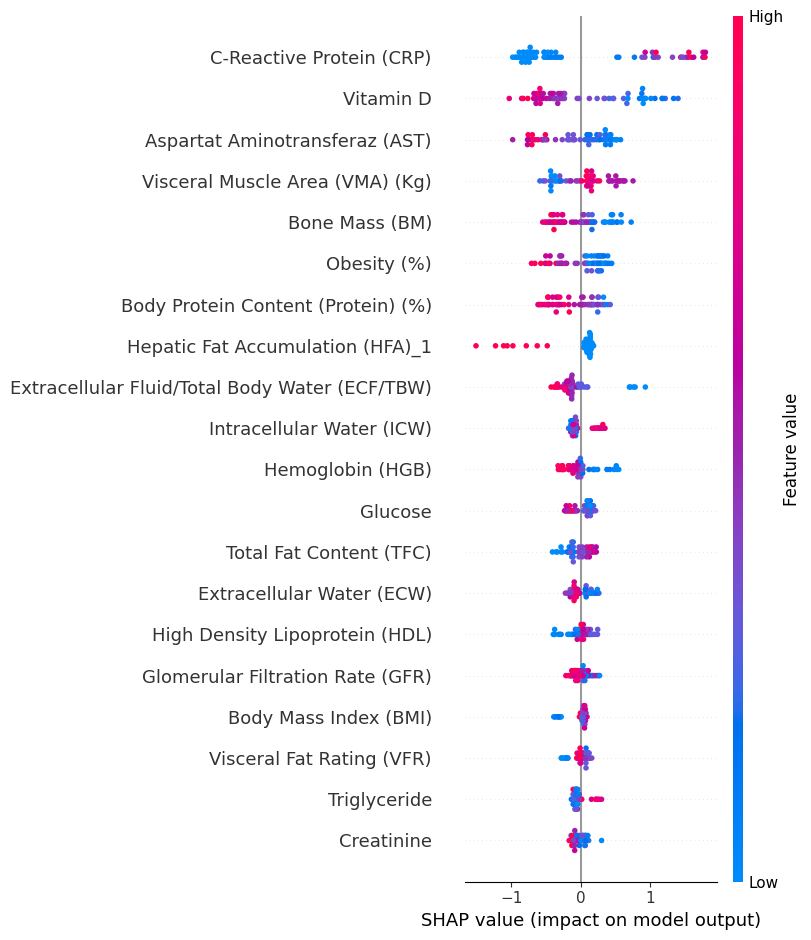

In [449]:
# PASSO 1: Selecione o modelo que você deseja explicar
model_to_explain = best_lgbm_model

# PASSO 2: Crie o objeto Explainer do SHAP
# IMPORTANTE: Use os dados de treino NORMALIZADOS
explainer = shap.Explainer(model_to_explain, X_train)

# PASSO 3: Calcule os valores SHAP para o conjunto de teste
# IMPORTANTE: Use os dados de teste NORMALIZADOS e adicione o parâmetro check_additivity=False
shap_values = explainer(X_test, check_additivity=False)

# PASSO 4: Gere o Gráfico de Resumo (Summary Plot)
print("Gerando o Gráfico de Resumo SHAP...")

shap.summary_plot(shap_values, 
                  X_test, 
                  feature_names=X.columns,
                  show=False) 

plt.savefig('shap_summary_plot.png', bbox_inches='tight')
plt.show()

Matriz de Confusão (Array):
[[29  4]
 [ 6 25]]


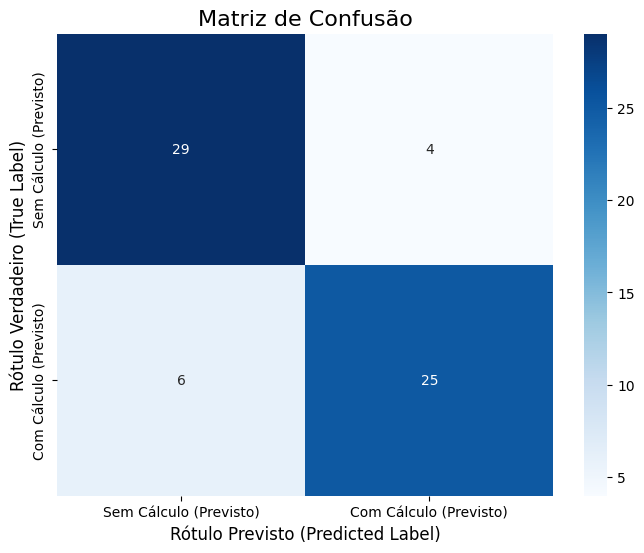

In [450]:
cm = confusion_matrix(Y_test, y_pred_tuned)

class_labels = ['Sem Cálculo (Previsto)', 'Com Cálculo (Previsto)']

print("Matriz de Confusão (Array):")
print(cm)

# --- 3. Plotar o Gráfico da Matriz de Confusão ---
plt.figure(figsize=(8, 6))

# O heatmap do Seaborn é ideal para visualizar a matriz de confusão
# annot=True: exibe os números em cada célula do heatmap
# fmt='d': formata os números como inteiros
# cmap: define o esquema de cores
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

# Adicionar títulos e rótulos para maior clareza
plt.title('Matriz de Confusão', fontsize=16)
plt.ylabel('Rótulo Verdadeiro (True Label)', fontsize=12)
plt.xlabel('Rótulo Previsto (Predicted Label)', fontsize=12)

# Exibir o gráfico
plt.show()

## Deep Learning

In [451]:
# Definir a arquitetura da rede neural
model = tf.keras.models.Sequential([
    # A primeira camada precisa saber o formato da entrada (input_shape)
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(units=16, activation='relu'),
    # Camada de saída com 1 neurônio e ativação sigmoid para classificação binária
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compilar o modelo
# 'adam' é um otimizador eficiente
# 'binary_crossentropy' é a função de perda para problemas de classificação binária
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Visualizar a arquitetura do modelo
model.summary()

C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 1,889 (7.38 KB)

 Non-trainable params: 0 (0.00 B)

In [452]:
# Treinar o modelo
history = model.fit(
    X_train, Y_train,
    epochs=150,  # Você pode ajustar este número
    batch_size=32,
    validation_data=(X_test, Y_test),
    verbose=1 # Mostra a barra de progresso
)

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.5020 - loss: 0.8240 - val_accuracy: 0.5156 - val_loss: 0.7591
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5020 - loss: 0.7262 - val_accuracy: 0.5156 - val_loss: 0.6987
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5608 - loss: 0.6836 - val_accuracy: 0.5781 - val_loss: 0.6854
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6510 - loss: 0.6720 - val_accuracy: 0.6094 - val_loss: 0.6764
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6549 - loss: 0.6664 - val_accuracy: 0.5938 - val_loss: 0.6679
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6667 - loss: 0.6579 - val_accuracy: 0.6094 - val_loss: 0.6581
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6745 - loss: 0.6493 - val_accuracy: 0.6250 - val_loss: 0.6524
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6667 - loss: 0.6430 - val_accuracy: 0.6250 - val_loss:

In [453]:
# Avaliar o desempenho do modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"\nAcurácia no conjunto de teste: {accuracy:.4f}")
print(f"Loss (perda) no conjunto de teste: {loss:.4f}")

# Fazer previsões
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int) # Converter probabilidades em classes 0 ou 1

cm = confusion_matrix(Y_test, y_pred)
VN, FP, FN, VP = cm.ravel()
especificidade = VN / (VN + FP)
print(f"\nEspecificidade (Taxa de Verdadeiros Negativos): {especificidade:.4f}")

# Mostrar um relatório de classificação mais detalhado
print("\nRelatório de Classificação:")
print(classification_report(Y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7500 - loss: 0.4504

Acurácia no conjunto de teste: 0.7500
Loss (perda) no conjunto de teste: 0.4504
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

Especificidade (Taxa de Verdadeiros Negativos): 0.8485

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        33
           1       0.80      0.65      0.71        31

    accuracy                           0.75        64
   macro avg       0.76      0.75      0.75        64
weighted avg       0.76      0.75      0.75        64



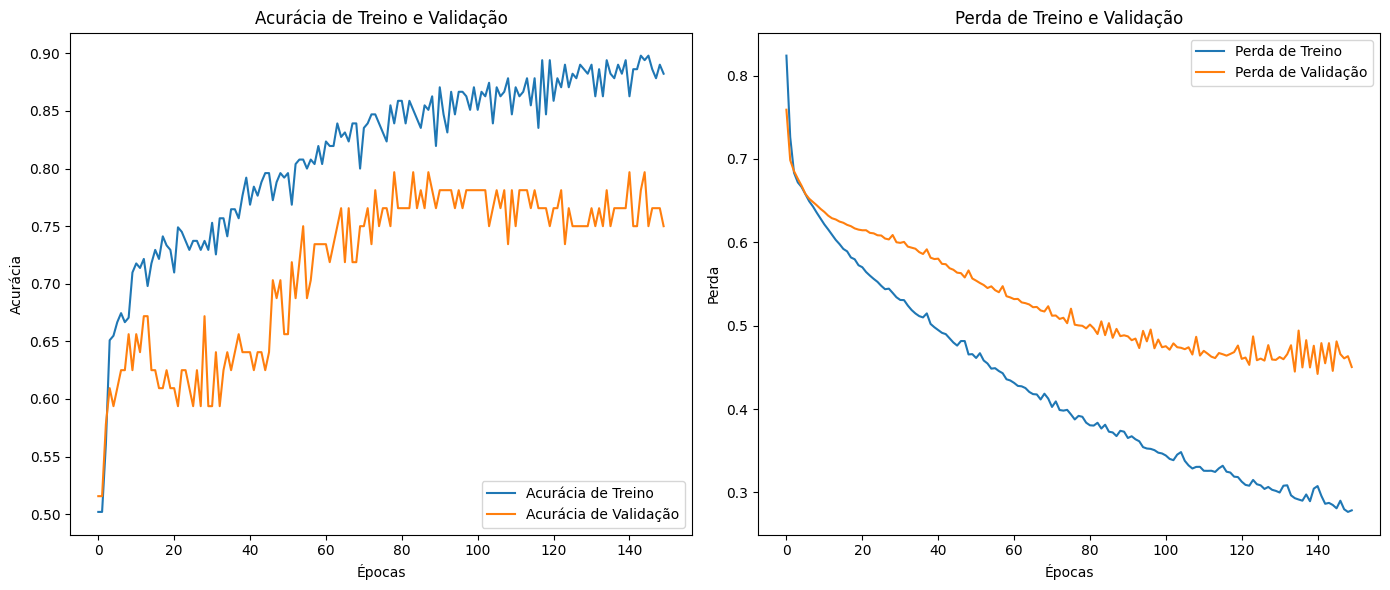

In [454]:
import matplotlib.pyplot as plt

# --- Execute este código APÓS a linha 'model.fit(...)' ---

# Extrair o histórico de acurácia e perda do objeto 'history'
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Criar a figura com dois subplots
plt.figure(figsize=(14, 6))

# Gráfico de Acurácia
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

# Gráfico de Perda (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')

# Ajustar o layout e mostrar/salvar a figura
plt.tight_layout()
plt.savefig("training_history.png") # Salva a imagem no disco
plt.show() # Mostra a imagem na tela

# Classificador por Voto

In [455]:
# Crie a lista de tuplas com um nome e o objeto do seu modelo JÁ TREINADO
estimators = [
    ('random_forest', best_rf_model),
    ('xgboost', best_xgb_model),
    ('svm', best_svm_model),
    ('gbm', best_gbm_model),
    ('Extra', best_et_model),
    ('catboost', best_catboost_model)
]

In [456]:
# Crie os Voting Classifiers
voting_clf_hard = VotingClassifier(estimators=estimators, voting='hard')
voting_clf_soft = VotingClassifier(estimators=estimators, voting='soft')

In [457]:
# Ajuste o Voting Classifier
print("Ajustando o Voting Classifier...")
voting_clf_hard.fit(X_train, Y_train)
voting_clf_soft.fit(X_train, Y_train)
print("Ajuste concluído!")

Ajustando o Voting Classifier...


C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:16:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:16:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Ajuste concluído!


In [458]:
# Agora você pode usá-lo para fazer previsões no conjunto de teste.
y_pred_hard = voting_clf_hard.predict(X_test)
y_pred_soft = voting_clf_soft.predict(X_test)

In [459]:
# Avalie a performance do ensemble
print("\n--- Avaliação do Ensemble com Hard Voting ---")
print(f"Acurácia: {accuracy_score(Y_test, y_pred_hard):.4f}")
print(classification_report(Y_test, y_pred_hard))

print("\n--- Avaliação do Ensemble com Soft Voting ---")
print(f"Acurácia: {accuracy_score(Y_test, y_pred_soft):.4f}")
print(classification_report(Y_test, y_pred_soft))


--- Avaliação do Ensemble com Hard Voting ---
Acurácia: 0.8281
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.86      0.77      0.81        31

    accuracy                           0.83        64
   macro avg       0.83      0.83      0.83        64
weighted avg       0.83      0.83      0.83        64


--- Avaliação do Ensemble com Soft Voting ---
Acurácia: 0.8594
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.84      0.87      0.86        31

    accuracy                           0.86        64
   macro avg       0.86      0.86      0.86        64
weighted avg       0.86      0.86      0.86        64

